# Loan Application Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

I have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# SETTING A customized plot style,font, figure and color
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [3]:
# loading the data
loan = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
# importing data from github directly

In [4]:
# looking at the shape
loan.shape

# There are 614 rows and 13 columns

(614, 13)

In [5]:
# Inorder to view all the columns while printing we are setting an option to display the maximum columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
# looking at the first 5 rows
loan.head(10)
# We can observe there can be null values in loanAmount column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
# looking at the last 10 rows
loan.tail(10)
# yes there are definitely  null values in loanAmount column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
# looking at some random rows
loan.sample(10)

# Now we can observe there are null values in self employed and credit history column as well

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
554,LP002789,Male,Yes,0,Graduate,No,3593,4266.0,132.0,180.0,0.0,Rural,N
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y
398,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural,Y
138,LP001492,Male,No,0,Graduate,No,14999,0.0,242.0,360.0,0.0,Semiurban,N
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
344,LP002128,Male,Yes,2,Graduate,NaN,2583,2330.0,125.0,360.0,1.0,Rural,Y
40,LP001119,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N
260,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N


In [9]:
loan.info()
# looking at the  info of the df
# There are 8 categoriucal and 5 continuous variables
# our target loan_status is a categorical variable with yes or no. so we are having a classification problem

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Checking the  Null Values

In [10]:
loan.isnull().sum()
# We can see there are null values in almost all the columns except 4

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

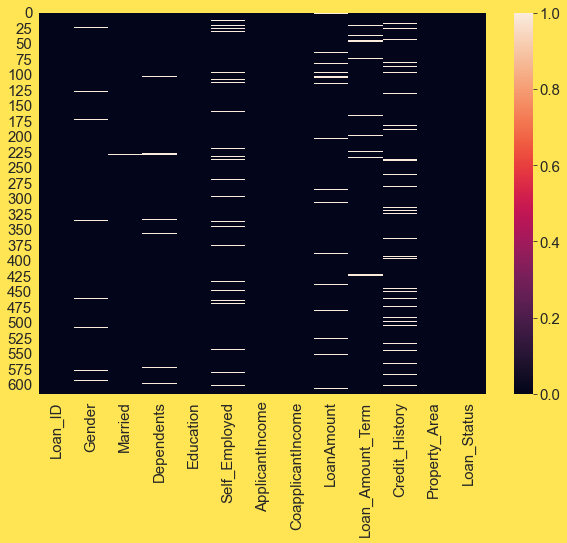

In [11]:
# plotting a heatmap 
sns.heatmap(loan.isnull())

In [12]:
loan.isnull().sum().sum()
# There are total 149 null values in the dataframe

149

In [13]:
# looking at the number of unique values in each column
for i in loan.columns:
    print(i,loan[i].nunique())
    
# Loan_ID column acts as an index, so we can drop it later. 

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 2
Property_Area 3
Loan_Status 2


In [14]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
# Treating null values
# checking the % of null values in each column
for i in loan.columns:
    print('% of null values in',i,': ',loan[i].isnull().sum()/614*100)

    # except self_employed and credit_History remaining columns have less than 5% null values in them

% of null values in Loan_ID :  0.0
% of null values in Gender :  2.1172638436482085
% of null values in Married :  0.4885993485342019
% of null values in Dependents :  2.44299674267101
% of null values in Education :  0.0
% of null values in Self_Employed :  5.211726384364821
% of null values in ApplicantIncome :  0.0
% of null values in CoapplicantIncome :  0.0
% of null values in LoanAmount :  3.5830618892508146
% of null values in Loan_Amount_Term :  2.2801302931596092
% of null values in Credit_History :  8.143322475570033
% of null values in Property_Area :  0.0
% of null values in Loan_Status :  0.0


In [16]:
# treating categorical null values
# let's find the mode of the categorical variables which have null values
cat_nulls = ['Gender','Married','Dependents','Self_Employed']
for i in cat_nulls:
    print('Mode of',i,'is',loan[i].mode()[0])

# We can just fill the null values with mode because the % of null values is less 
# And this can be the ideal method to fill the null values without any impact on the original data
# we could have dropped the null values, the data is less and droppin is not suggestible

Mode of Gender is Male
Mode of Married is Yes
Mode of Dependents is 0
Mode of Self_Employed is No


In [17]:
# Replacing the null values with mode
# Replacing null values in categorical columns using pandas fillna method
loan["Gender"] = loan["Gender"].fillna(loan["Gender"].mode()[0])
loan["Married"] = loan["Married"].fillna(loan["Married"].mode()[0])
loan["Dependents"] = loan["Dependents"].fillna(loan["Dependents"].mode()[0])
loan["Self_Employed"] = loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0])

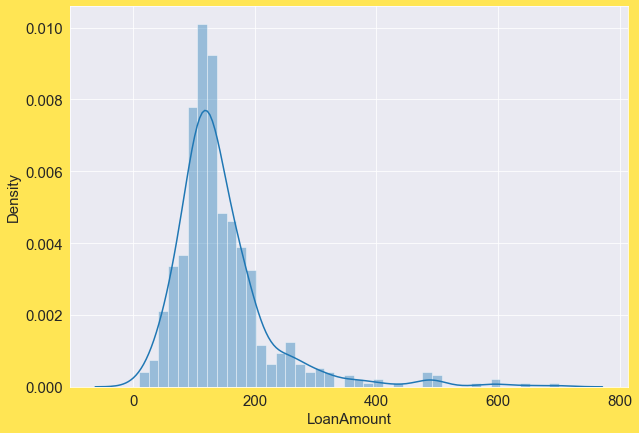

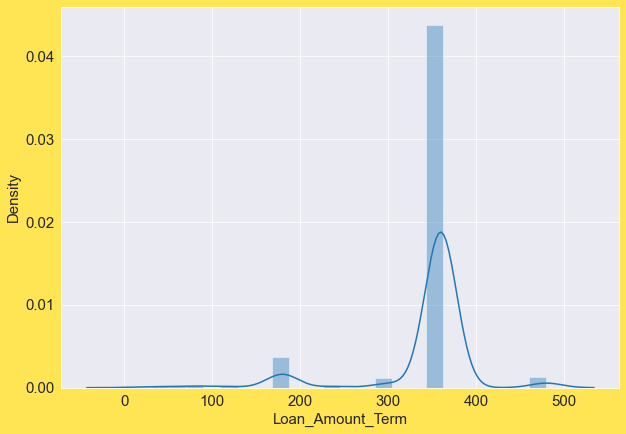

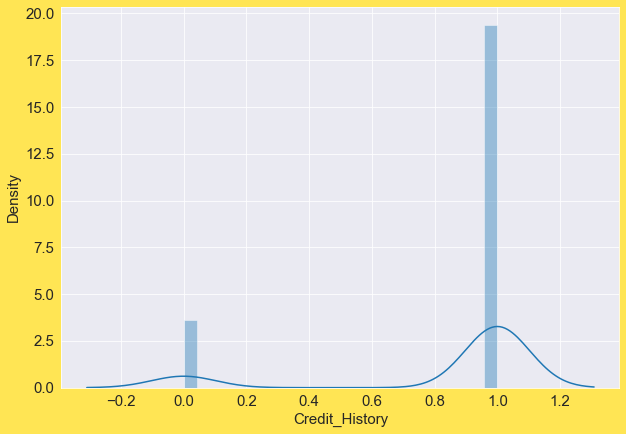

In [18]:
# Now treating the continuous null columns 
# there are only three columns
# loanAmount,loan_Amount_Term and Credit_History

count_nulls = ['LoanAmount','Loan_Amount_Term','Credit_History']
for i in count_nulls:
    sns.distplot(loan[i])
    plt.show()


In [19]:
# unique values
for i in count_nulls:
    print(loan[i].value_counts())

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
128.0    11
113.0    11
130.0    10
95.0      9
96.0      9
112.0     8
70.0      8
115.0     8
104.0     7
132.0     7
135.0     7
125.0     7
136.0     7
150.0     7
138.0     6
81.0      6
90.0      6
80.0      6
175.0     6
155.0     6
144.0     6
180.0     6
158.0     6
116.0     6
111.0     5
133.0     5
185.0     5
152.0     5
108.0     5
124.0     5
71.0      5
200.0     5
140.0     5
134.0     4
172.0     4
66.0      4
94.0      4
123.0     4
137.0     4
131.0     4
50.0      4
84.0      4
182.0     4
105.0     4
151.0     4
122.0     4
55.0      4
126.0     4
88.0      4
99.0      4
98.0      4
60.0      4
102.0     3
103.0     3
67.0      3
74.0      3
118.0     3
255.0     3
260.0     3
162.0     3
75.0      3
225.0     3
188.0     3
107.0     3
93.0      3
480.0     3
173.0     3
170.0     3
165.0     3
127.0     3
168.0     3
275.0     3
121.0     2
148.0     2
87.0      2
40.0      2
186.0     2
45.0      2
56.0

In [20]:
# Althogh there are continuous columns with null values
# they are having only few unique value counts, so it is better if we replace the null values with the most frequent occured values
# filling the values in loanAmount and Term with the median 
# And credit_history with its mode because there are only two categories in it.
# As the data is heavily skewed and might contain outliers, we are using median.

loan["LoanAmount"] = loan["LoanAmount"].fillna(loan["LoanAmount"].median())
loan["Loan_Amount_Term"] = loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].median())
loan["Credit_History"] = loan["Credit_History"].fillna(loan["Credit_History"].mode()[0])

In [21]:
# checking the null values again
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

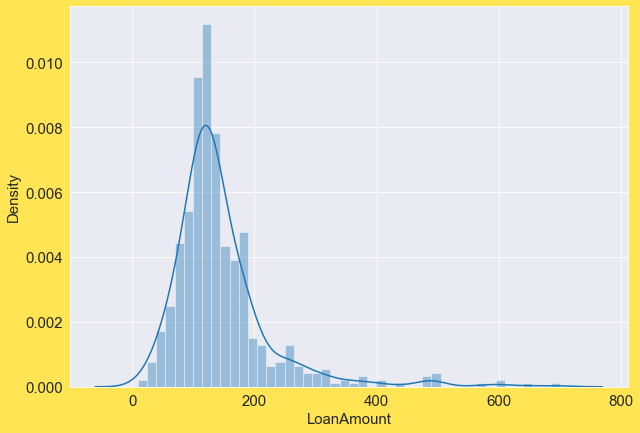

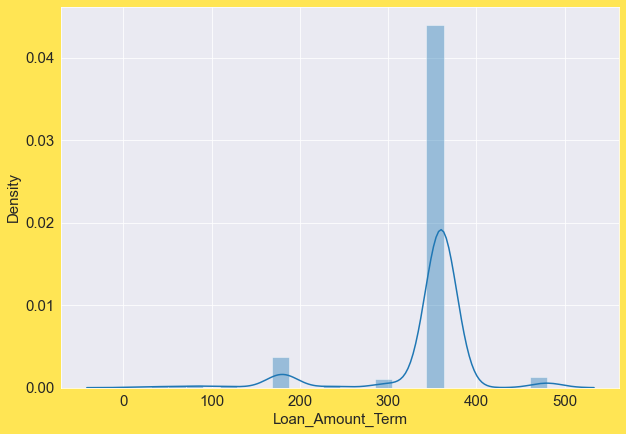

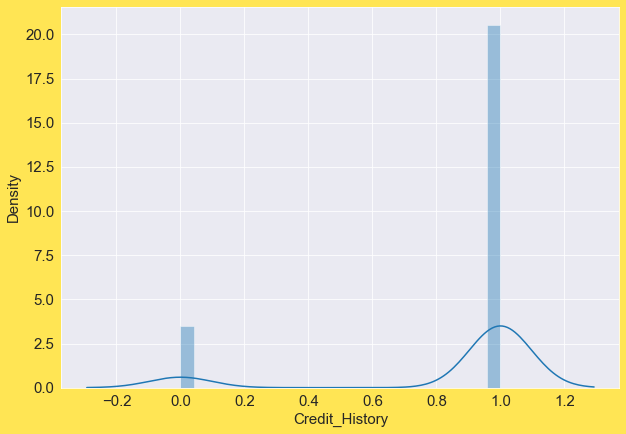

In [22]:
# Now checking if the distribution has changed or not
count_nulls = ['LoanAmount','Loan_Amount_Term','Credit_History']
for i in count_nulls:
    sns.distplot(loan[i])
    plt.show()

In [23]:
# Checking if there are any duplicates
duplicates = loan[loan.duplicated()]
duplicates

# There are no duplicates in the df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [24]:
# Checking if there are any blank values in any column of the bdf
for i in loan.columns:
    print(loan.loc[loan[i] == " "])
    
# We can observe there are no blank values in the dataframe

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []
Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Cred

## EDA

In [25]:
loan.describe().T

# we got the description of the continuous columns
# We can see that there are many outliers present in all the columns except credit_history
# And it is highly skewed
# We can observe the highest maximum income of the applicant is 81000  and coapplicant income is 41667
# and max loan term is 480 and min is 12

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


In [26]:
# looking at the categorical cols as well
loan.describe(include='O').T

# There are alot of men, married, graduate and living in semiurban area people in this data

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,614,2,Male,502
Married,614,2,Yes,401
Dependents,614,4,0,360
Education,614,2,Graduate,480
Self_Employed,614,2,No,532
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [27]:
# As we have discussed we should drop the loan_Id as it is just a index
loan.drop(['Loan_ID'],axis=1,inplace=True)

In [28]:
loan.shape

(614, 12)

In [29]:
loan.columns
# We have dropped loan_id

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Univariate Analysis

In [30]:
# categorical features
cat_cols = loan.dtypes[loan.dtypes == 'object'].index.tolist()
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [31]:
cont_cols = loan.dtypes[loan.dtypes != 'object'].index.tolist()
cont_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Male      502
Female    112
Name: Gender, dtype: int64


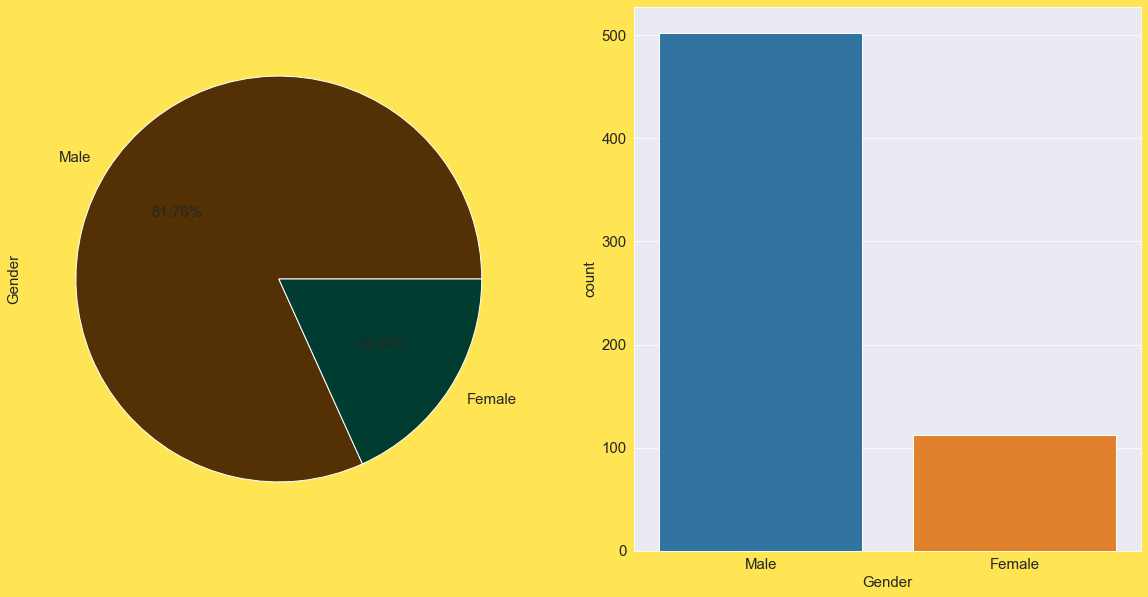

Yes    401
No     213
Name: Married, dtype: int64


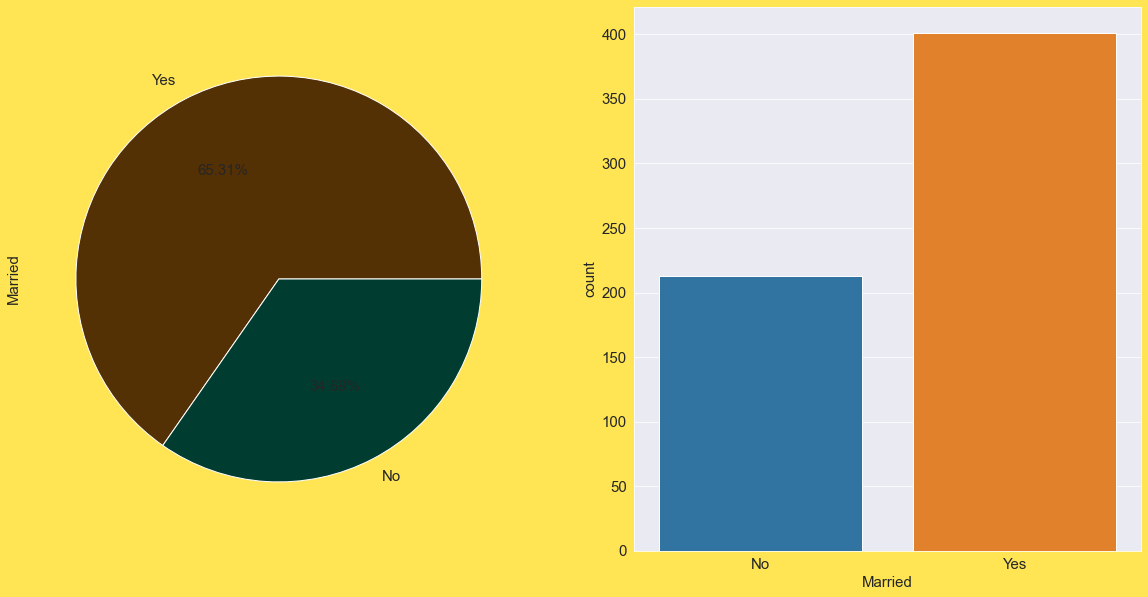

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


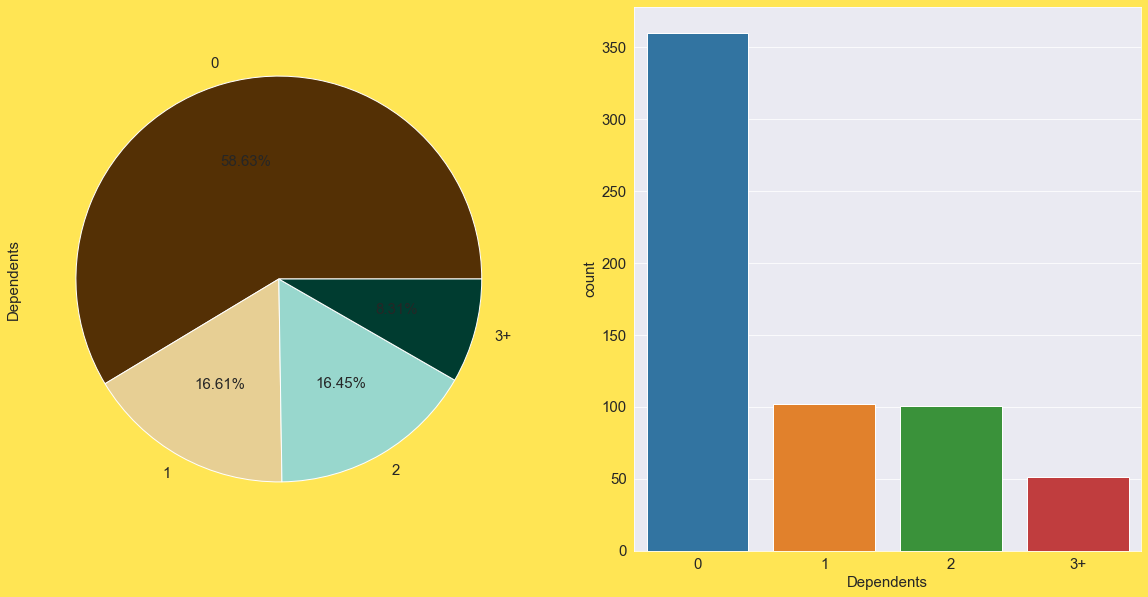

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


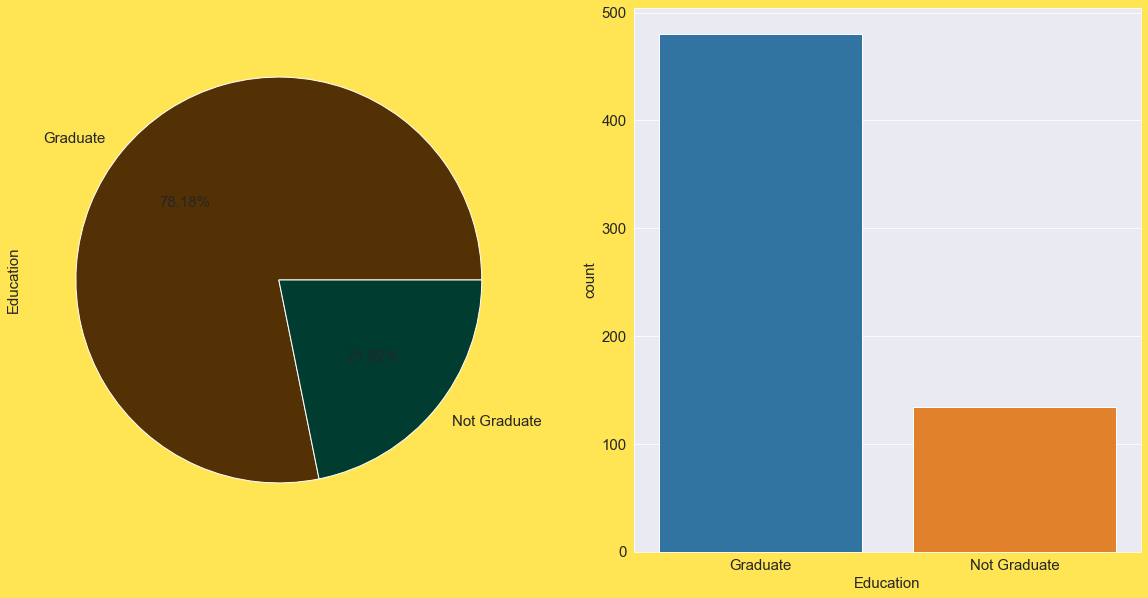

No     532
Yes     82
Name: Self_Employed, dtype: int64


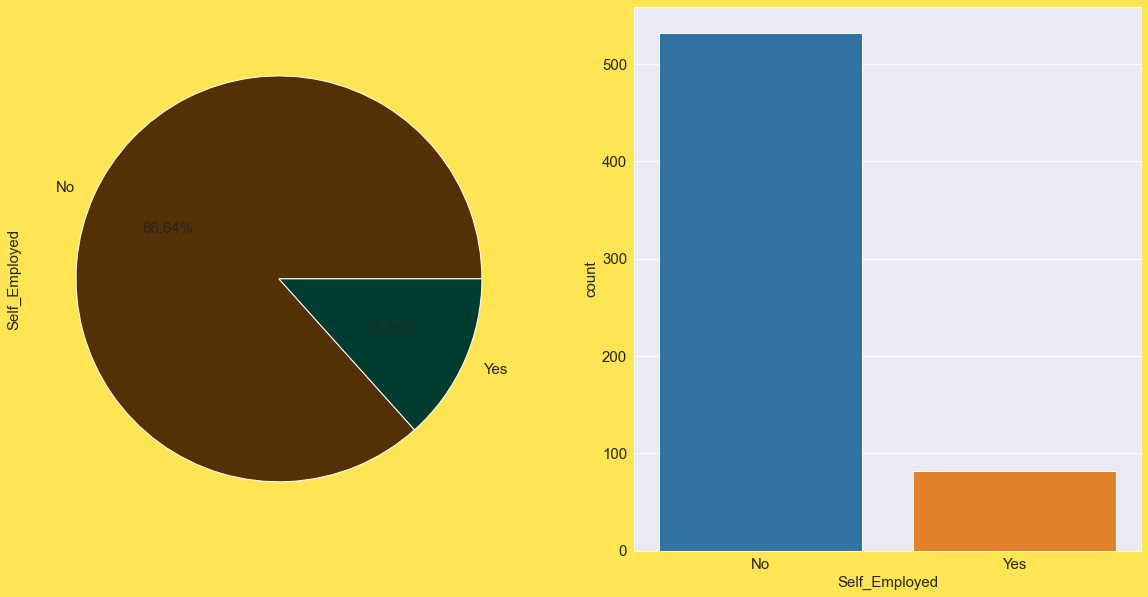

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


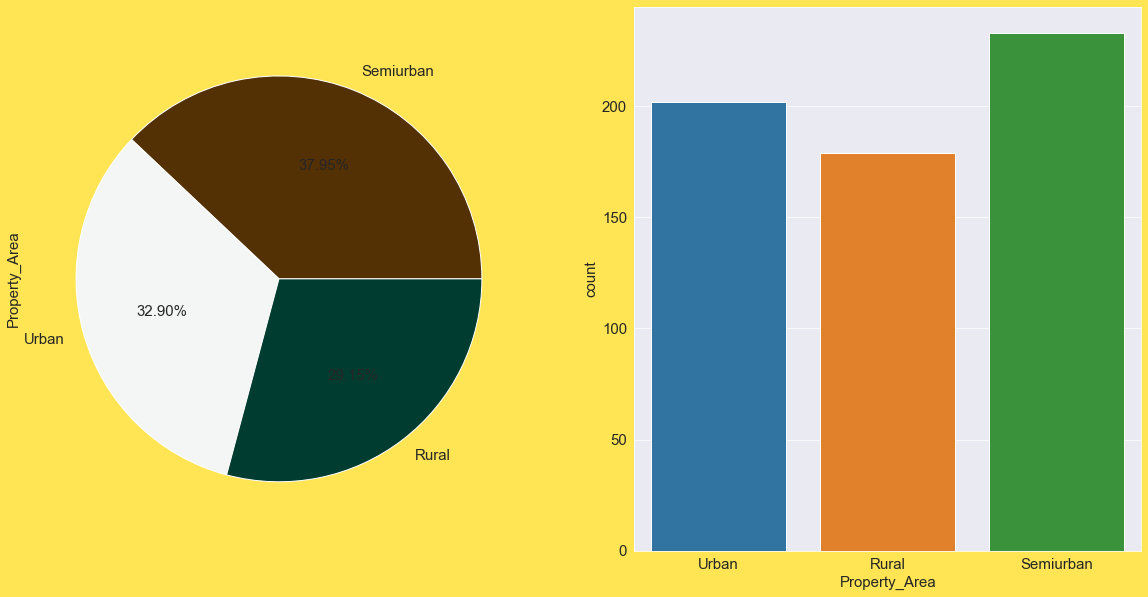

Y    422
N    192
Name: Loan_Status, dtype: int64


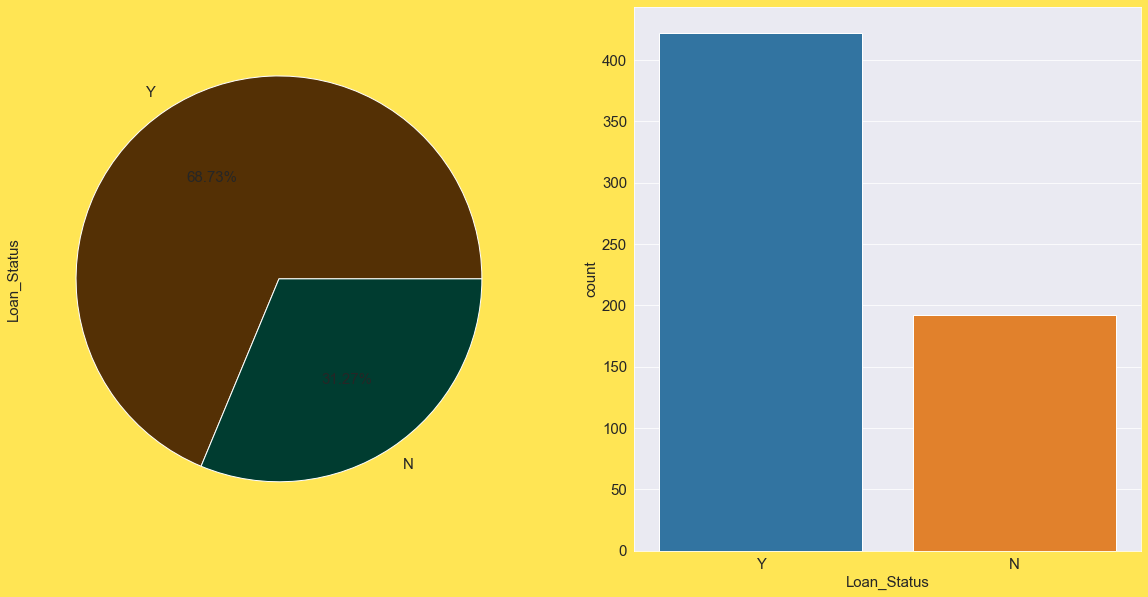

In [32]:
# plotting a bar plot and countplot to look at the catgeories
for i in cat_cols:
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2)
    sns.countplot(i,data=loan)
    plt.subplot(1,2,1)
    loan[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(loan[i].value_counts())
    plt.show()


Observations:

-> Men are significantly higher in number than women

-> People who are married are twice as much as who are not married

-> Interestingly people who are without any dependents are extremely higher in number.

-> there are 4 time more graduates than those who are not graduates

-> Most of the people are having employees working and only few are selfemployed.

-> Semiurban residents are slightly more than that of rural and urban area residents.

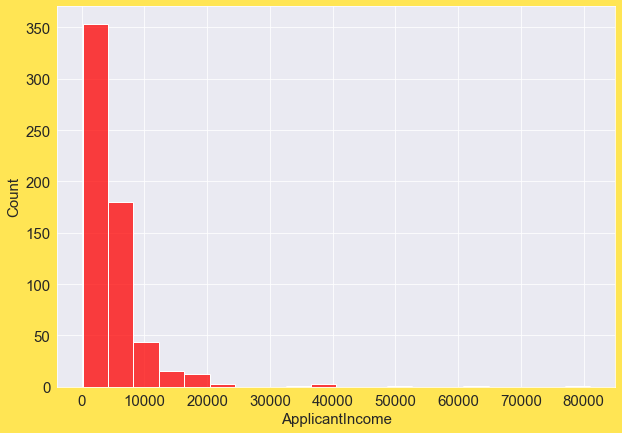

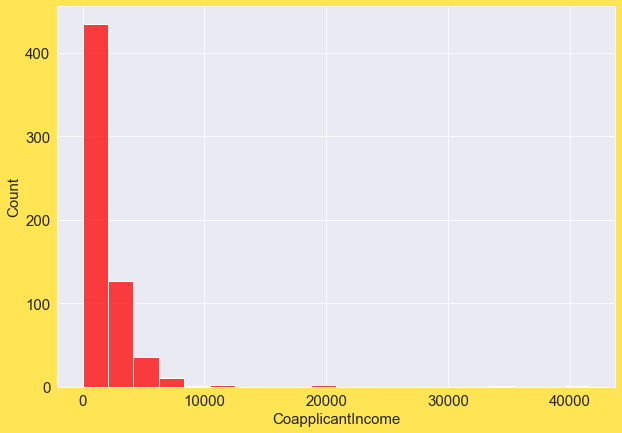

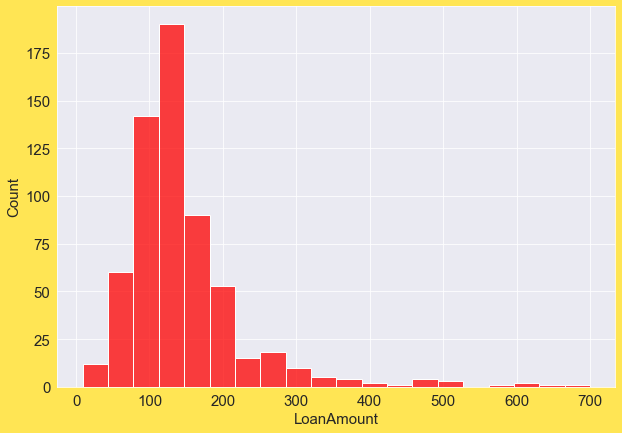

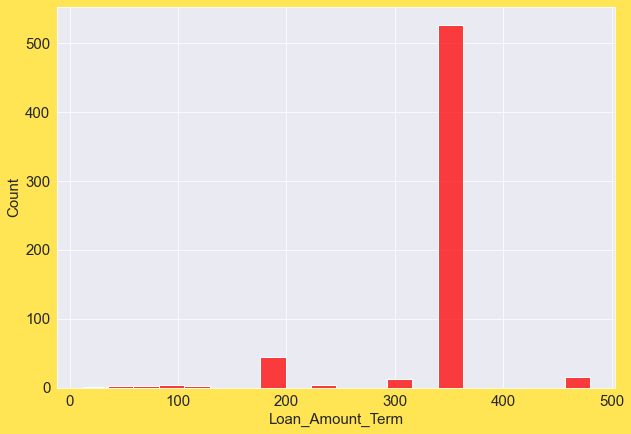

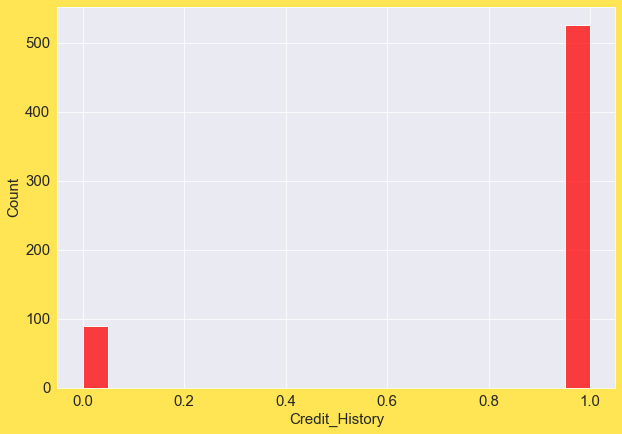

In [33]:
# plotting a histogram to check the values and distribution of cont_cols
for i in cont_cols:
    sns.histplot(loan[i],bins=20,color='red')
    plt.show()

Observations:-
    
-> Most of the applicants have income ranging between 0-10000, And only few have greater than 40000

-> Same with the coapplicants income, Althogh only few people have income up to 20000

-> Majority of the loan amount ranges between 0 - 200 and only few people took higher than 600

-> loan_Amount_term was high between300 to 400

-> Majority of the people have 1.0 credit history

### Bivariate Analysis

In [34]:
# taking out predictor from cat_cols using pop
cat_cols.pop(6)

'Loan_Status'

In [35]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [36]:
cont_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

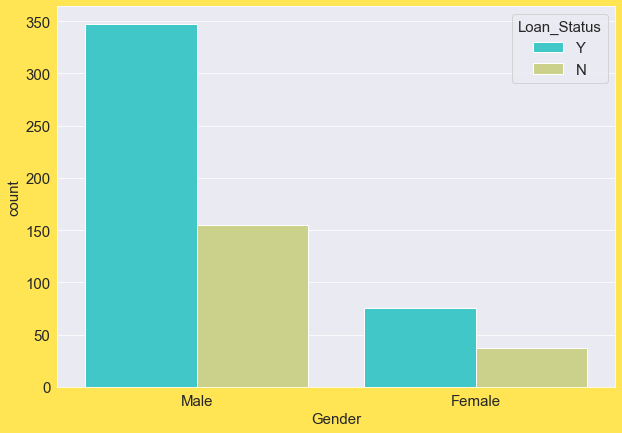

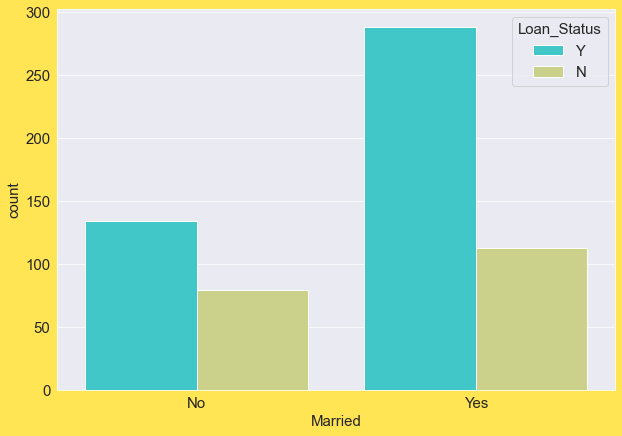

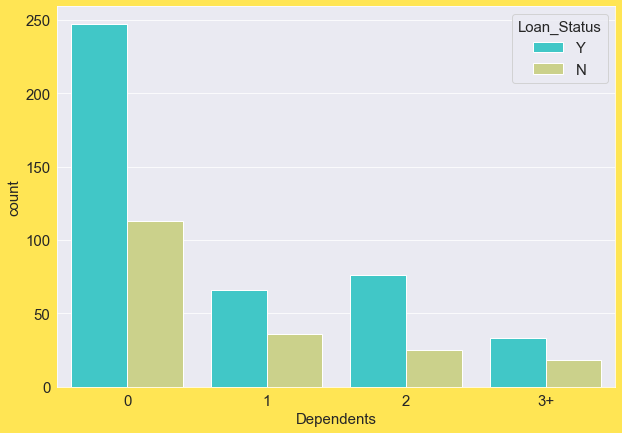

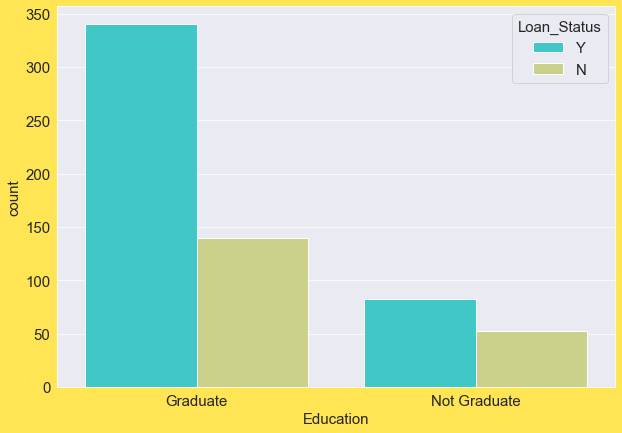

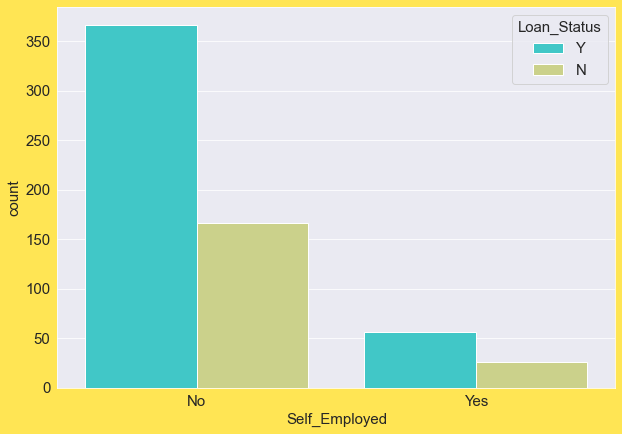

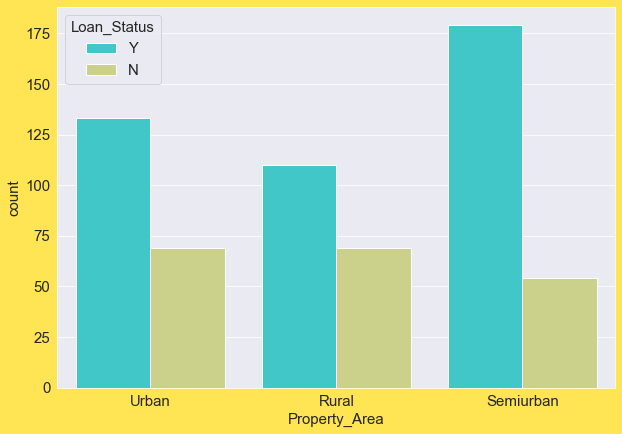

In [37]:
# plotting count plot to know the relationship of the cat features with its target loan_status
for i in cat_cols:
    sns.countplot(loan[i],hue='Loan_Status',data=loan,palette='rainbow')
    plt.show()

-> Men has significantly higher chance of loan approval than women.

-> Also married people have more chance of loan approval, which makes sense beacause they will have their spouses as an additional income source, which
   makes it easier for loan approval following the 2 dependents candidates.
    
-> People with 0 dependent who are higher in number have more chance of loan approval. 

-> People who completed their graduation have more approval rate because, you will have a skilled job with good salary if you      are a graduate and loan approvals become easy that way.

-> People living in semiurban areas have more approval rate than other areas, Rural areas have less approval rate.

-> Employess working with other companies are having more approval rate than self employed applicants.

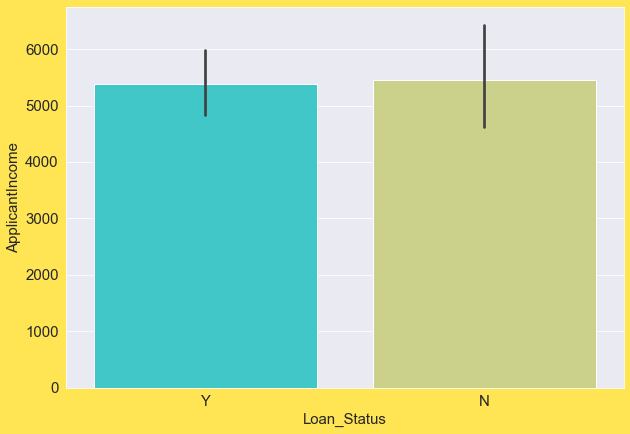

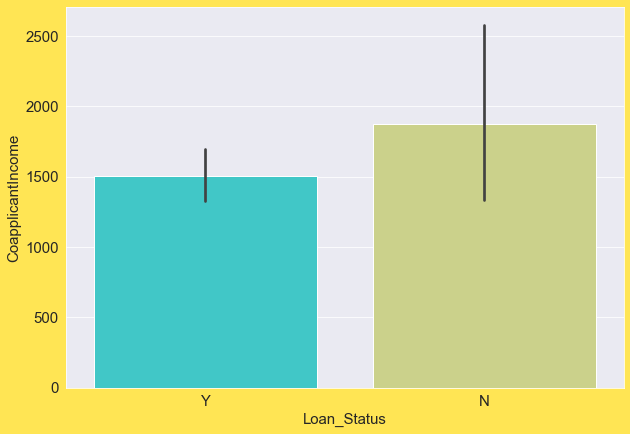

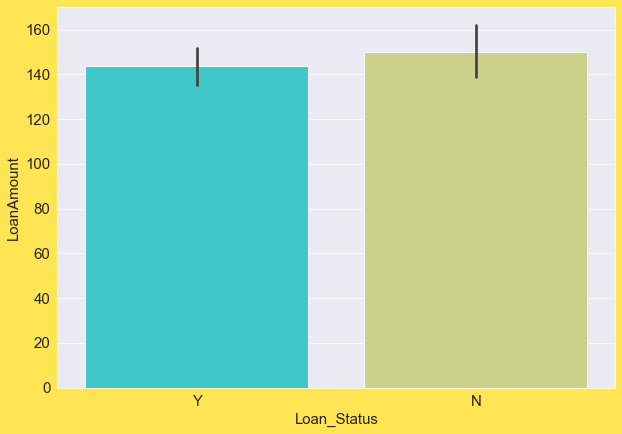

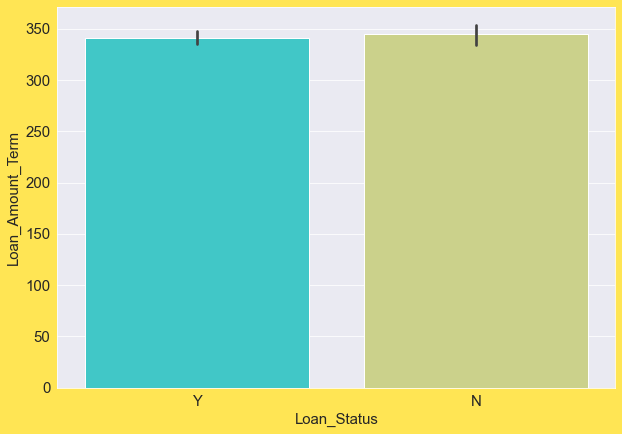

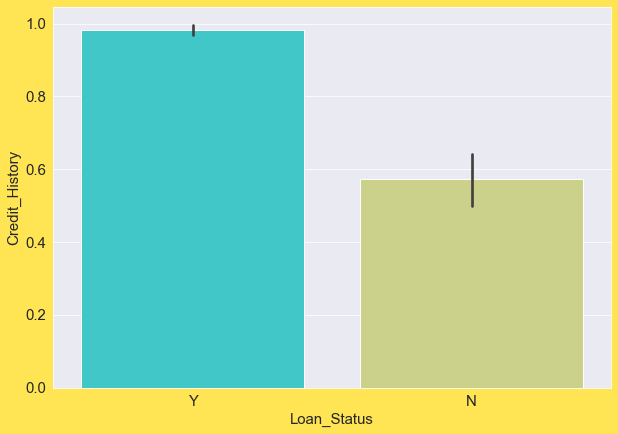

In [38]:
# plotting count plot to know the relationship of the cont features with its target loan_status
for i in cont_cols:
    sns.barplot(loan['Loan_Status'],loan[i],data=loan,palette='rainbow')
    plt.show()

-> There is almost no difference in loan_status even if the applicant_income is more 5000

-> Coapplicants wo have more than 1500 income are not likely to get approval

-> people who wants to take loanAmount higher than 140 has slightly less approvals

-> And people who have credit_history from 0.6 to 1.0 are having higher chance of getting their loan approval.With less than 0.6 credit_history
   there are higher chances of rejection

### Multivariate Analysis

<AxesSubplot:title={'center':'Comparision between ApplicantIncome and LoanAmount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

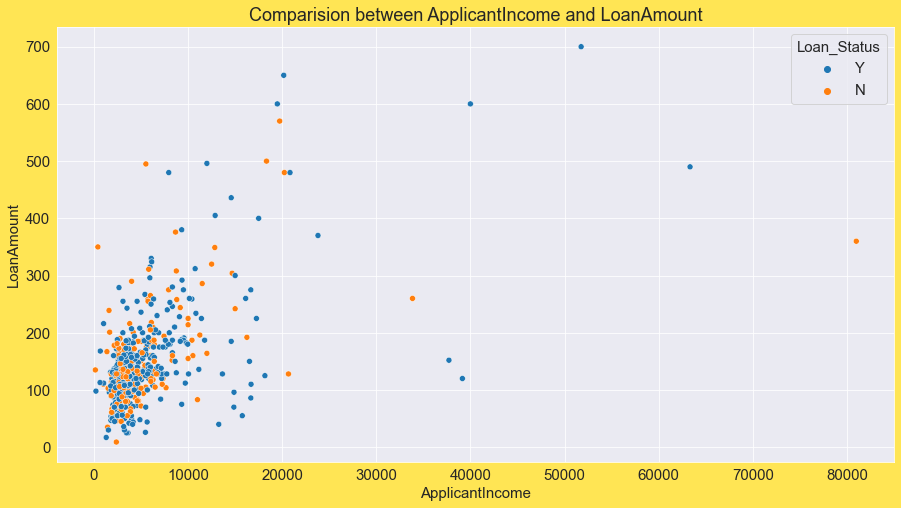

In [39]:
#Comparision between features using scatter plot
plt.figure(figsize=[15,8])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(loan['ApplicantIncome'],loan['LoanAmount'],hue=loan['Loan_Status'])

-> There is a high density of points in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount.

-> Which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

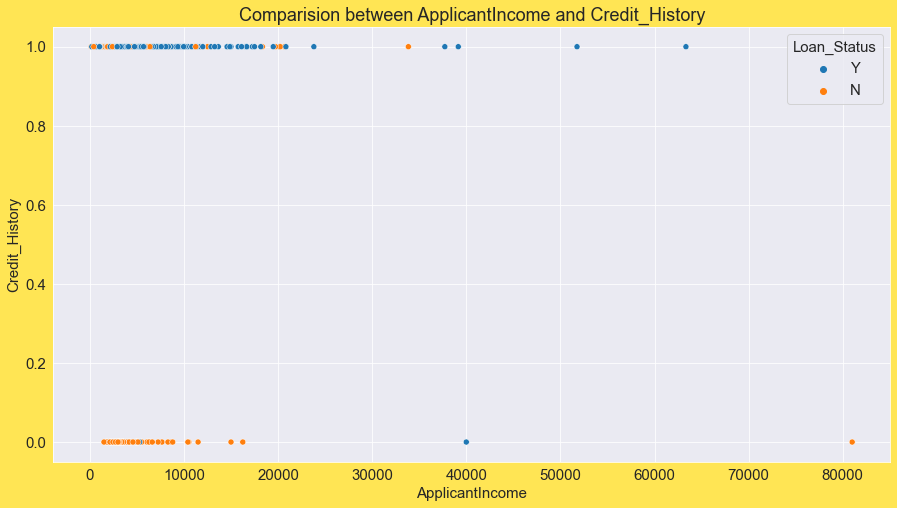

In [40]:
#Comparision between features using scatter plot
plt.figure(figsize=[15,8])
plt.title('Comparision between ApplicantIncome and Credit_History')
sns.scatterplot(loan['ApplicantIncome'],loan['Credit_History'],hue=loan['Loan_Status']);

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

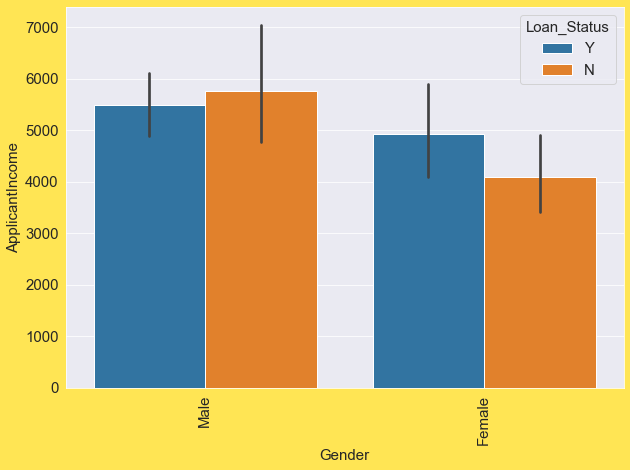

In [41]:
# plotting barplots
sns.barplot(x="Gender",y="ApplicantIncome",hue = "Loan_Status", data=loan)
plt.xticks(rotation=90)


Male applicants has chance of getting loan approved irrespective of income of the applicant

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

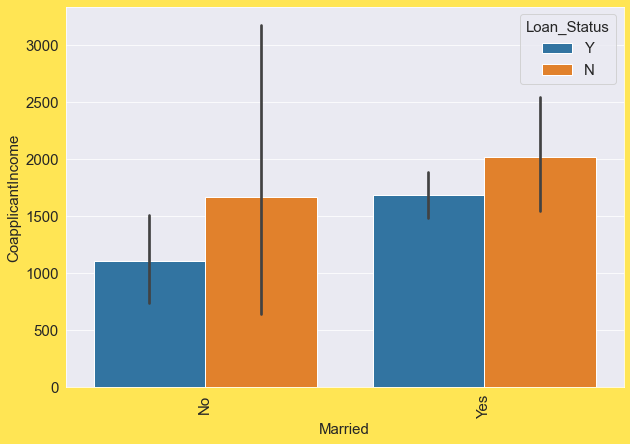

In [42]:
sns.barplot(x="Married",y="CoapplicantIncome",hue ="Loan_Status",data=loan)
plt.xticks(rotation=90)

Married people has more chance of getting loan approved.

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

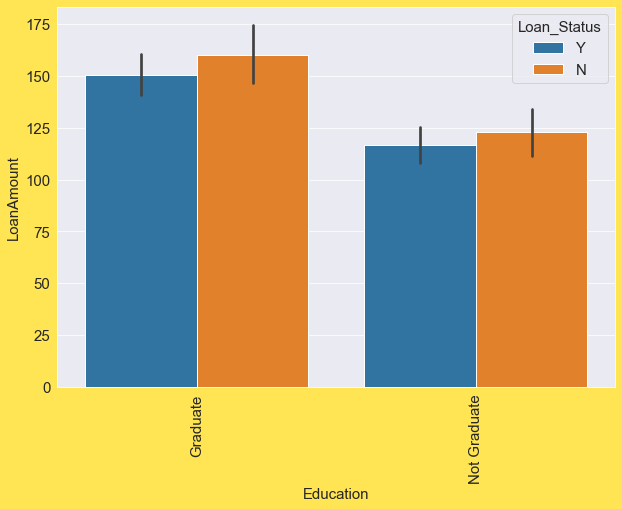

In [43]:
sns.barplot(x="Education",y="LoanAmount",hue ="Loan_Status",data=loan)
plt.xticks(rotation=90)

Irrespective of the loanAmount if the applicant is a graduate there is a high chance of loan approval

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

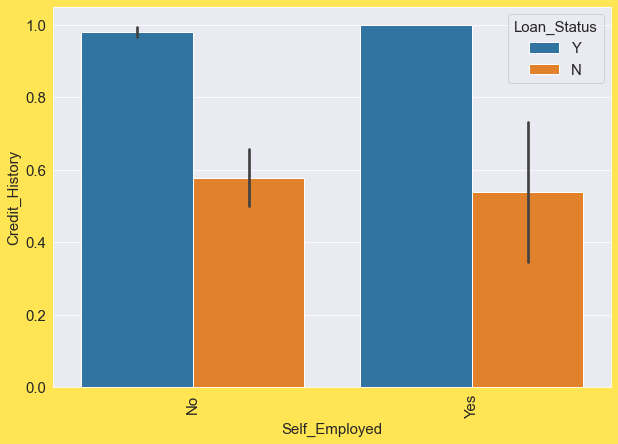

In [44]:
sns.barplot(x ="Self_Employed",y="Credit_History",hue ="Loan_Status",data=loan)
plt.xticks(rotation=90)

There is very less chance of getting loan approved for self employed applicants.

Althogh if the credit score is more there is chance that self-employed candidates can also avail the loan

(array([0, 1, 2]),
 [Text(0, 0, 'Urban'), Text(1, 0, 'Rural'), Text(2, 0, 'Semiurban')])

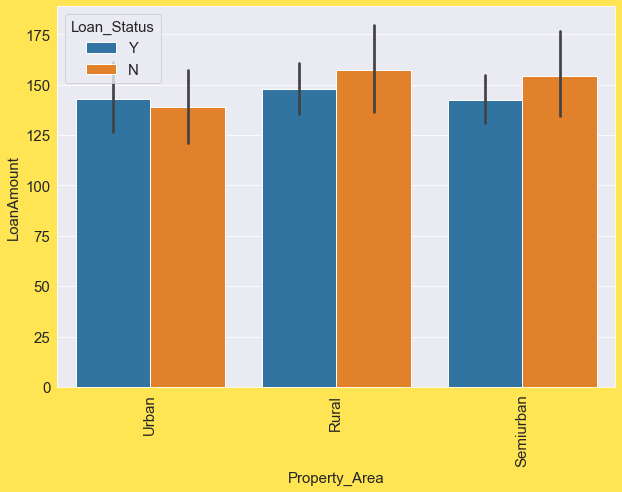

In [45]:
sns.barplot(x ="Property_Area",y="LoanAmount",hue ="Loan_Status",data=loan)
plt.xticks(rotation=90)

We can observe irrespective of the loan amount rural areas has more rejections, which makes sense because, the property value in the rural areas is far less compared to the urban and semi urban.

### Encoding the target column for further analysis

In [46]:
# first encoding the target Loan_Status yes or no
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan['Loan_Status']= le.fit_transform(loan['Loan_Status'])

In [47]:
# # Calaculating the % approvals for each categorical variable

for i in cat_cols:
    print(loan.groupby(i)['Loan_Status'].mean()*100)
    print('\n')
    

Gender
Female    66.964286
Male      69.123506
Name: Loan_Status, dtype: float64


Married
No     62.910798
Yes    71.820449
Name: Loan_Status, dtype: float64


Dependents
0     68.611111
1     64.705882
2     75.247525
3+    64.705882
Name: Loan_Status, dtype: float64


Education
Graduate        70.833333
Not Graduate    61.194030
Name: Loan_Status, dtype: float64


Self_Employed
No     68.796992
Yes    68.292683
Name: Loan_Status, dtype: float64


Property_Area
Rural        61.452514
Semiurban    76.824034
Urban        65.841584
Name: Loan_Status, dtype: float64




In [48]:
# looking at the pivot table between Gender and Jobrole comparing the attrition rate
loan.pivot_table('Loan_Status',index='Gender',columns='Education')*100

# Interestingly we can see that women who didn't do graduation has higher approval rate than that of men

Education,Graduate,Not Graduate
Gender,,
Female,66.304348,70.000000
Male,71.907216,59.649123


<AxesSubplot:xlabel='Gender'>

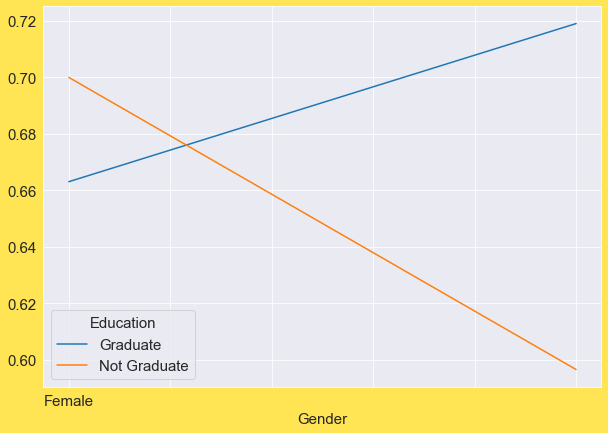

In [49]:
# plotting the same
loan.pivot_table('Loan_Status',index='Gender',columns='Education').plot()

# We can see that approval rate is decling for non-graduates

In [50]:
# another pivot table
loan.pivot_table('Loan_Status',index='Married',columns='Property_Area')*100
# Married people in semiurban areas has more approval than that of rural and urban areas
# Unmarried individuals in urban areas has very low approval rate than rural and semiurban areas

Property_Area,Rural,Semiurban,Urban
Married,,,
No,60.317460,70.000000,57.142857
Yes,62.068966,80.392157,70.454545


<AxesSubplot:xlabel='Married'>

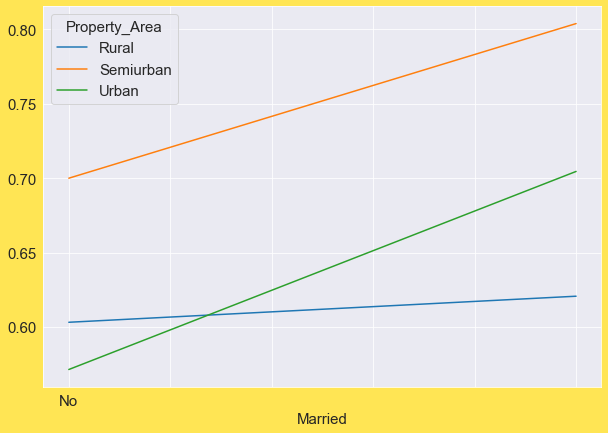

In [51]:
loan.pivot_table('Loan_Status',index='Married',columns='Property_Area').plot()

# We can see that 

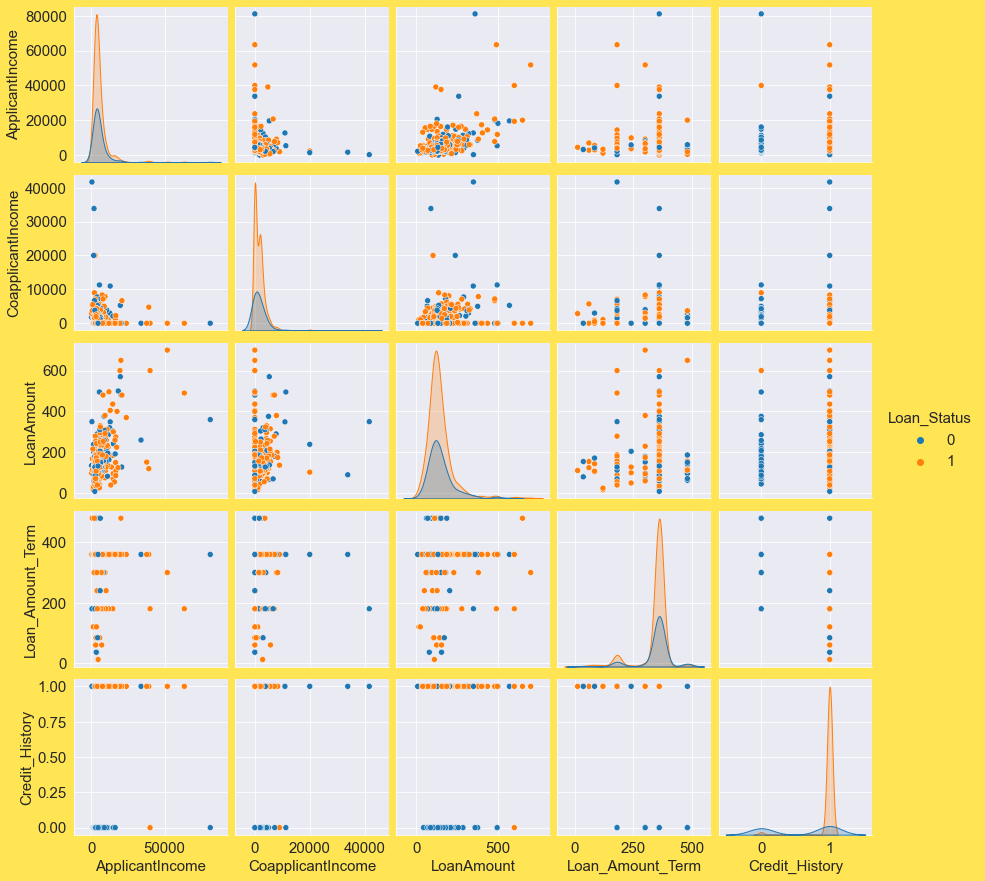

In [52]:
sns.pairplot(loan,hue='Loan_Status')

# We can see that there are many columns that are highly correlated with the target Loan-staus
# And there are many outliers and skewness is also high

### Encoding the categorical features

In [53]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [54]:
# We are using onehot encoder for the rest of the columns because it comes under nominal data and it doesn't have any order
# Now encoding the categorical variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first') # We are dropping one dummy column from each encoded feature to avoid multicollinearity

df_object = loan.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(cat_cols)

loan_new = pd.concat([loan.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [55]:
loan_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [56]:
loan_new.shape

(614, 15)

##  CHECKING AND TREATING OUTLIERS

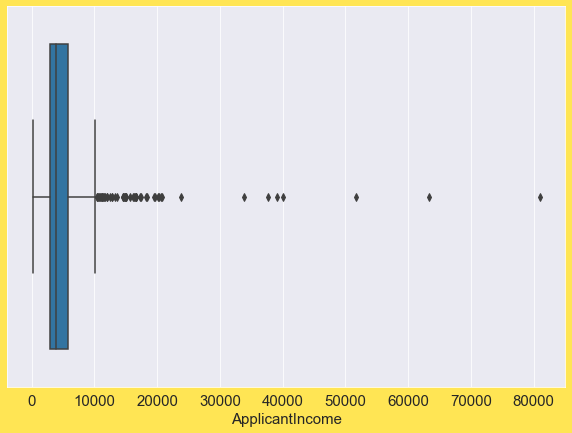

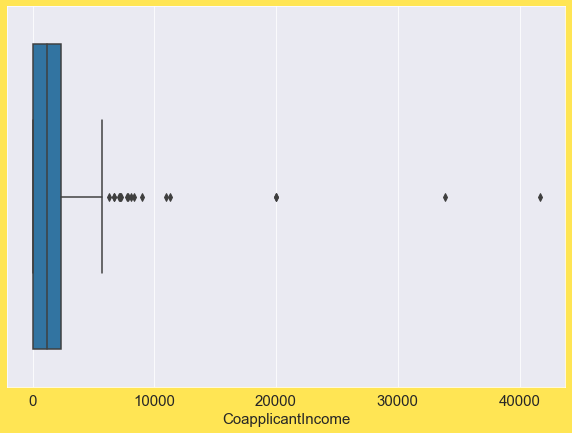

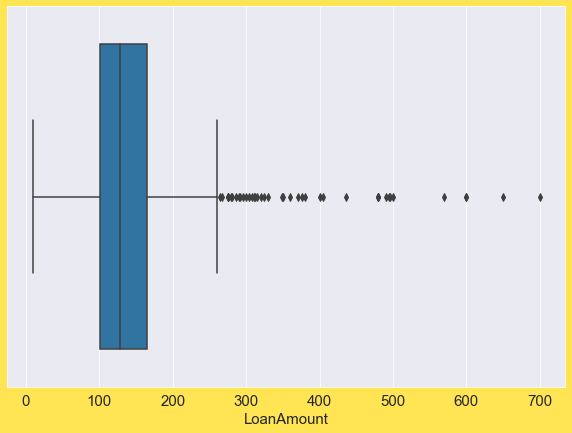

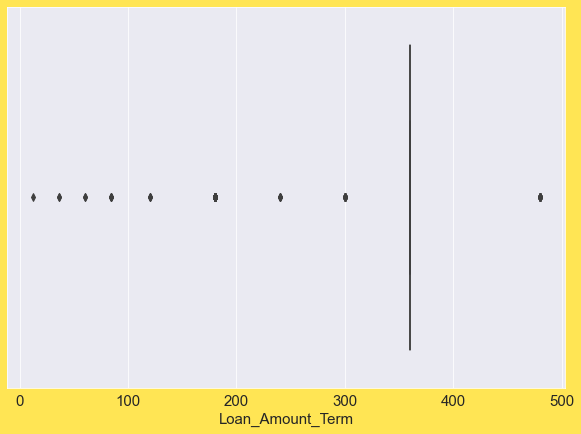

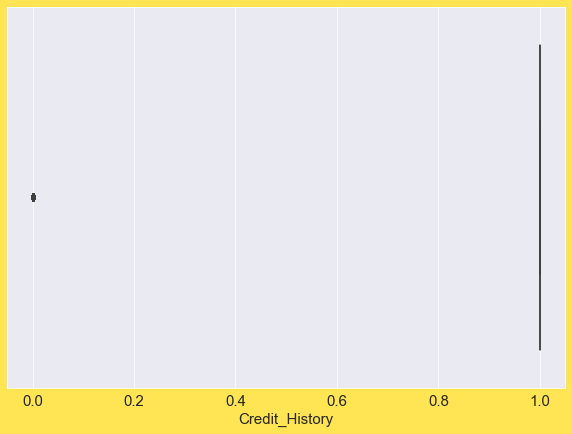

In [57]:
# plotting outliers in continuos columns
for i in cont_cols:
    sns.boxplot(loan_new[i])
    plt.show()
    
# We CAN OBSERVE OTLIERS PRESENT IN ALL THE COLUMNS
# However credit_history and loan_amount term is categorical as there only a few categories of values in it.
# So we cannot remove outliers from them

In [58]:
cont_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [59]:
# using zscore method
from scipy.stats import zscore

out_cols = loan_new[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

z=np.abs(zscore(out_cols))

print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [60]:
loan_df = loan_new[(z<3).all(axis=1)]

In [61]:
# checking the % of dataloss after removing the outliers

print("shape before and after")
print("shape before: ",loan_new.shape)
print("shape after: ",loan_df.shape)
print("Percentage Loss: ",(loan_new.shape[0]-loan_df.shape[0])/loan_new.shape[0]*100)

# The data loss is around 6% we can go ahead and remove the outliers

shape before and after
shape before:  (614, 15)
shape after:  (577, 15)
Percentage Loss:  6.026058631921824


In [62]:
# CHECKING WITH THE IQR METHOD AS WELL
Q1=out_cols.quantile(0.25)
Q3=out_cols.quantile(0.75)
IQR=Q3 - Q1

loan_new_quant = loan_new[~((loan_new < (Q1 - 1.5 * IQR)) |(loan_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
print("shape before and after")
print("shape before: ", loan_new.shape)
print("shape after: ", loan_new_quant.shape)
print("Percentage Loss: ", (loan_new.shape[0]-loan_new_quant.shape[0])/loan_new.shape[0]*100)

# We can see that the data loss is more(25%) using IQR method so we choose zscore method

shape before and after
shape before:  (614, 15)
shape after:  (459, 15)
Percentage Loss:  25.2442996742671


In [64]:
loan_df.shape

(577, 15)

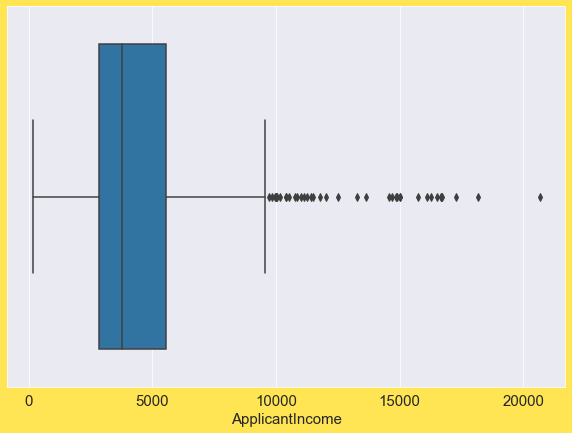

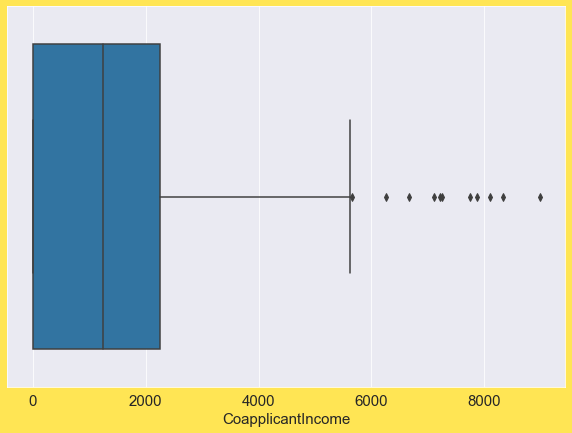

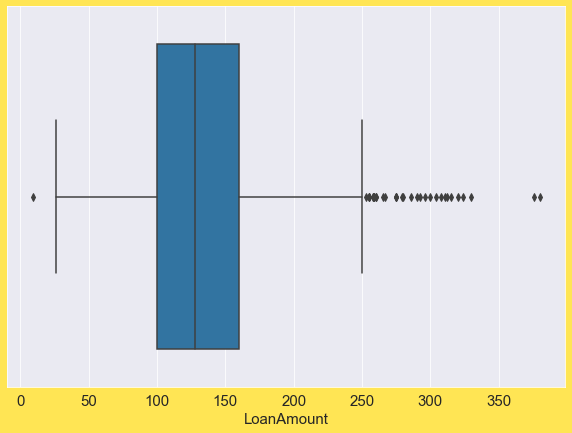

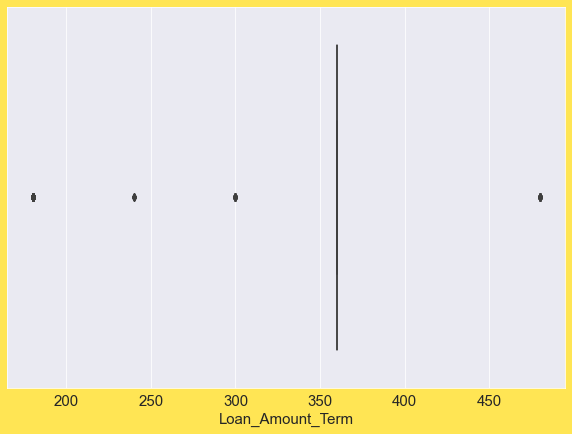

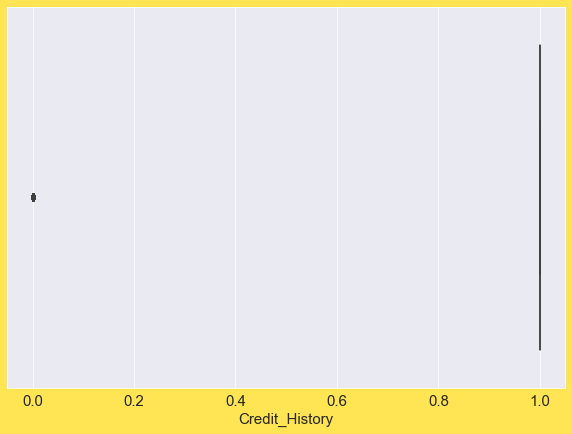

In [65]:
# checking the outliers again
for i in cont_cols:
    sns.boxplot(loan_df[i])
    plt.show()
    
# We can see that the outliers have been removed

## CHECKING AND TREATING THE SKEWNESS

In [66]:
loan_df.skew()

ApplicantIncome            2.148522
CoapplicantIncome          1.350517
LoanAmount                 1.151525
Loan_Amount_Term          -2.098806
Credit_History            -1.976043
Loan_Status               -0.822635
Gender_Male               -1.622920
Married_Yes               -0.630211
Dependents_1               1.847753
Dependents_2               1.813247
Dependents_3+              3.201476
Education_Not Graduate     1.306588
Self_Employed_Yes          2.252848
Property_Area_Semiurban    0.512963
Property_Area_Urban        0.736780
dtype: float64

In [67]:
# Now we have only three columns that we have to remove skewness 
# We don't have to remove skewness from credit_history and Loan_Amount_Term beacuse they are categorical)

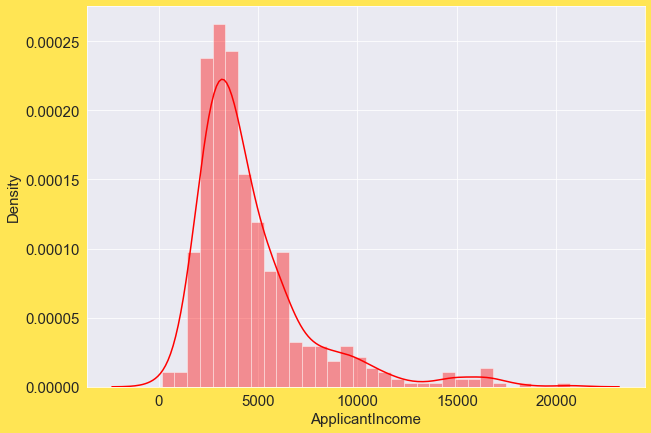

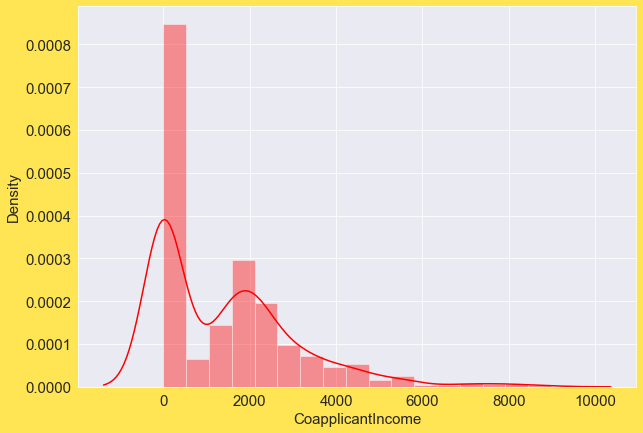

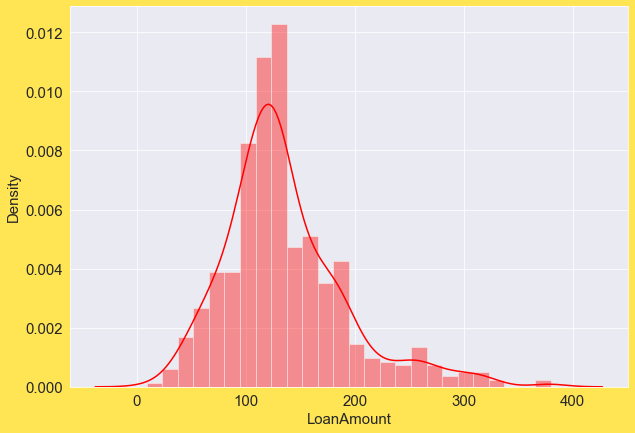

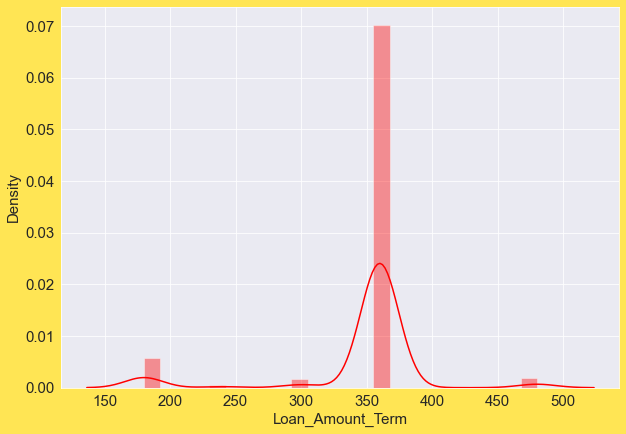

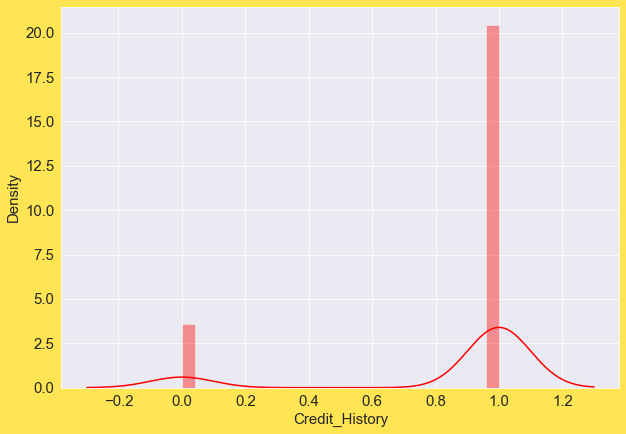

In [68]:
# checking skewnss
for i in cont_cols:
    sns.distplot(loan_df[i],color='red')
    plt.show()

# We can see the skewness

In [69]:
# making an instance of skewed cols
skewed_cols =["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [70]:
# using powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [71]:
loan_df[skewed_cols] = pt.fit_transform(loan_df[skewed_cols].values)

In [72]:
# checking the skewness again
loan_df[skewed_cols].skew().sort_values()

# We can see that the skewness has been removed

CoapplicantIncome   -0.191876
ApplicantIncome      0.027981
LoanAmount           0.048425
dtype: float64

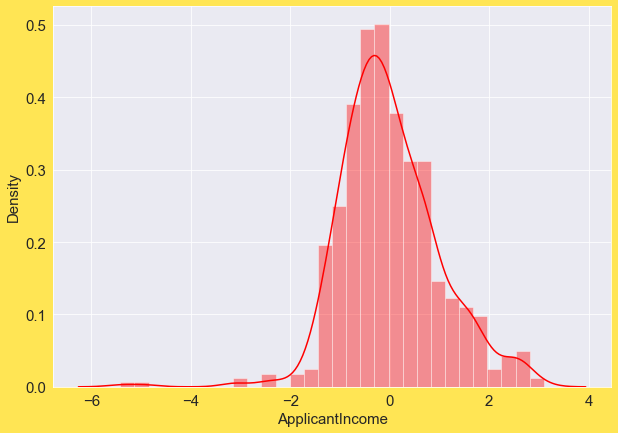

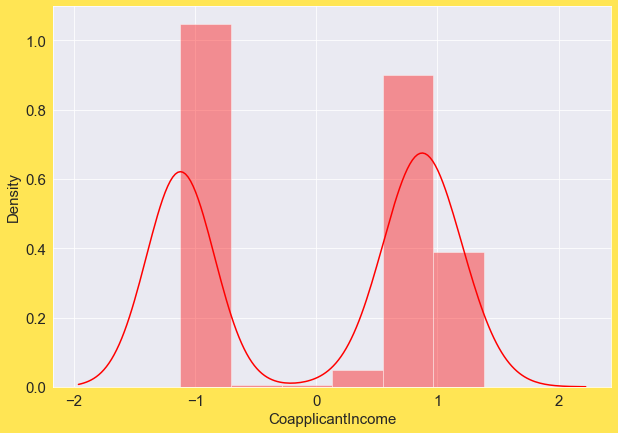

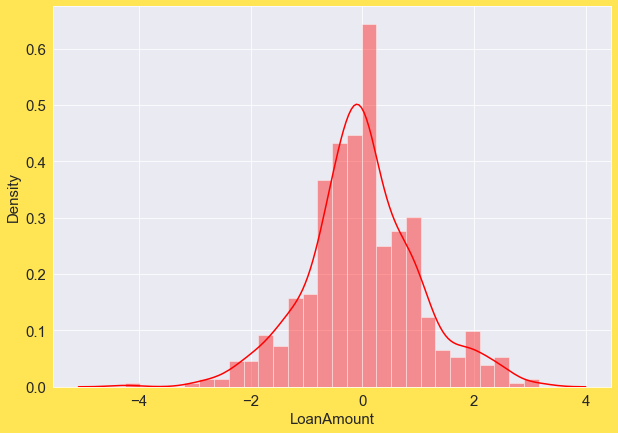

In [73]:
# checking the distribution plot again
for i in skewed_cols:
    sns.distplot(loan_df[i],color='red')
    plt.show()
    
# We can see that skewness has been reduced

## Correlation

In [74]:
loan_df.corr().T
# We can see the correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.002484,0.058590,-0.024783,0.052637,0.035739,0.074770,-0.176074,0.212260,-0.013498,-0.002590
CoapplicantIncome,-0.360946,1.000000,0.200081,0.000951,0.006564,0.079344,0.234551,0.335820,0.026946,0.050964,-0.054788,0.049739,-0.087338,-0.004015,-0.060552
LoanAmount,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.023609,0.172146,0.181878,0.045031,0.079945,0.069296,-0.128715,0.117218,0.015470,-0.090463
Loan_Amount_Term,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.020291,-0.104983,-0.127348,-0.100806,-0.000356,-0.062252,-0.090523,-0.032914,0.083917,-0.091239
Credit_History,0.028825,0.006564,-0.003626,0.027392,1.000000,0.560936,0.013172,0.019308,-0.001835,0.002092,-0.026439,-0.075217,-0.016390,0.043632,-0.029346
Loan_Status,-0.002484,0.079344,-0.023609,-0.020291,0.560936,1.000000,0.017408,0.089026,-0.021897,0.055274,-0.019058,-0.092658,-0.026525,0.141686,-0.050830
Gender_Male,0.058590,0.234551,0.172146,-0.104983,0.013172,0.017408,1.000000,0.378997,0.027240,0.127659,0.103487,0.045696,-0.006207,-0.099044,0.028965
Married_Yes,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.089026,0.378997,1.000000,0.114210,0.247458,0.128736,0.024817,-0.015779,0.014767,0.001288
Dependents_1,0.052637,0.026946,0.045031,-0.100806,-0.001835,-0.021897,0.027240,0.114210,1.000000,-0.194606,-0.125945,-0.001287,0.102568,-0.019225,0.095783
Dependents_2,0.035739,0.050964,0.079945,-0.000356,0.002092,0.055274,0.127659,0.247458,-0.194606,1.000000,-0.127556,0.027125,-0.000268,0.012272,0.008784


<AxesSubplot:>

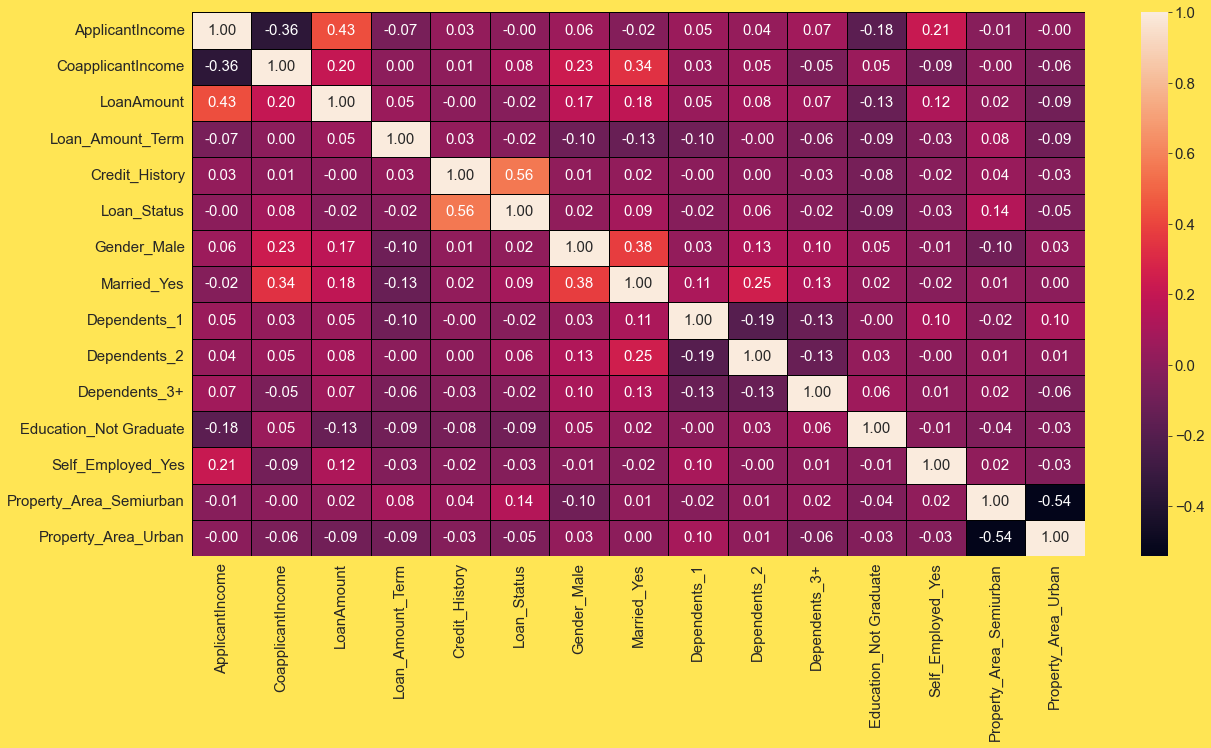

In [75]:
# plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(loan_df.corr(),annot=True,linewidths=1.0,linecolor='black',fmt='.2f')

We can notice that with target loan_status  column ApplicantIncome and CoapplicantIncome is very less correlated.

Almost all the columns are least correlated with the target loan_status

Neverthless w ehave to check for multi collinearity

In [76]:
# checking the correlation with respect to target
loan_df.corr()['Loan_Status'].sort_values()

Education_Not Graduate    -0.092658
Property_Area_Urban       -0.050830
Self_Employed_Yes         -0.026525
LoanAmount                -0.023609
Dependents_1              -0.021897
Loan_Amount_Term          -0.020291
Dependents_3+             -0.019058
ApplicantIncome           -0.002484
Gender_Male                0.017408
Dependents_2               0.055274
CoapplicantIncome          0.079344
Married_Yes                0.089026
Property_Area_Semiurban    0.141686
Credit_History             0.560936
Loan_Status                1.000000
Name: Loan_Status, dtype: float64

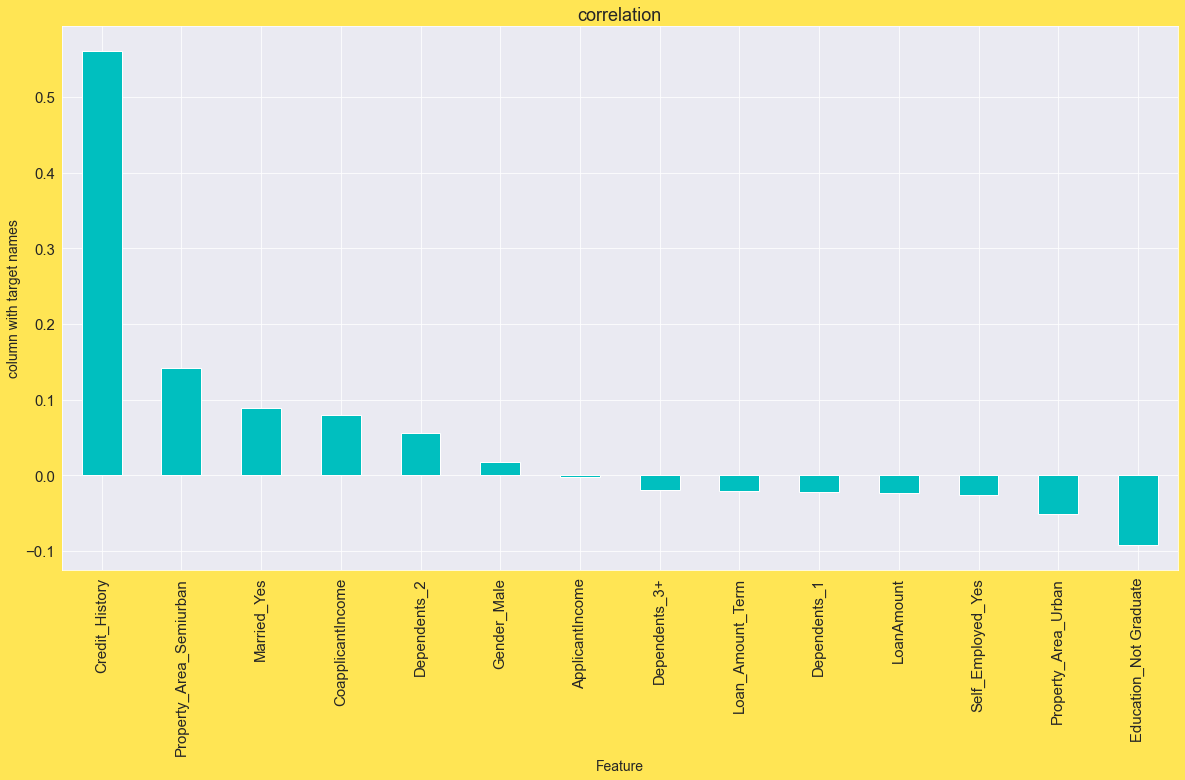

In [77]:
# plotting a bar graph to understand the same
plt.figure(figsize=(20,10))
loan_df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [78]:
# SEPARATING THE FEATURES AND TARGET
x = loan_df.drop("Loan_Status",axis=1)
y = loan_df["Loan_Status"]

### SCALING THE DATA

In [79]:
# Inorder to check the multicollinearity we need to scale the data first
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [80]:
# Now we have scaled the data
# we have to check for multicollinearity

In [81]:
# importing vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
def vif_calc():
    vif=pd.DataFrame()
    vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    return vif


In [83]:
vif_calc()

# We can see that there absolutely no sign of multicollinearity

,vif_Features,Features
0,1.763314,ApplicantIncome
1,1.593388,CoapplicantIncome
2,1.557101,LoanAmount
3,1.070134,Loan_Amount_Term
4,1.011564,Credit_History
5,1.238744,Gender_Male
6,1.438147,Married_Yes
7,1.150301,Dependents_1
8,1.194684,Dependents_2
9,1.127252,Dependents_3+


In [84]:
# checking the target
y.value_counts()

# We can see that the data is imbalanced

1    398
0    179
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

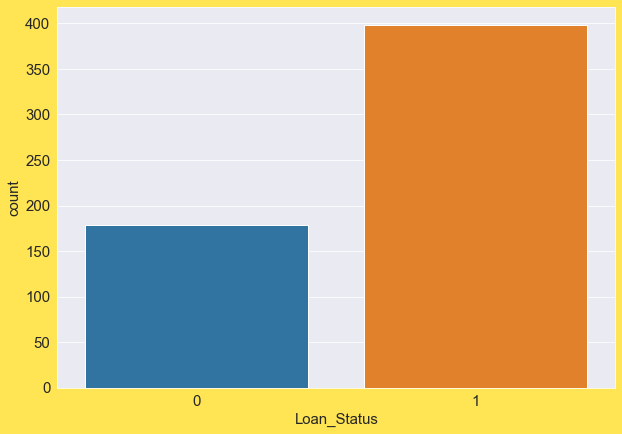

In [85]:
# plotting to see visually
sns.countplot(y)
# We can clearly see in the plot as well

In [86]:
# We have to balance the data using imb learn smote

In [87]:
# importing smote from imb learn , using oversampling method
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x , y = sm.fit_resample(x,y)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

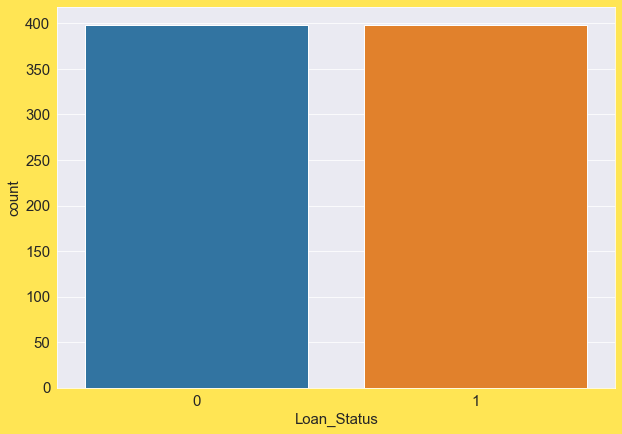

In [88]:
# checking again
sns.countplot(y)

# Now the data is balanced

In [89]:
x.shape

(796, 14)

In [90]:
y.shape

(796,)

## MODEL BUILDING

In [91]:
# importing all the necessary models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [92]:
# Creating instances for models
lor = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
sgdc = SGDClassifier()
xgbc = XGBClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()

### Logistic Regression

In [93]:
# finding the best random state for logistic regression
lor = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lor.fit(x_train,y_train)
    pred_train = lor.predict(x_train)
    pred_test = lor.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')
        
        
# getting 73% accuracy with random_state 862
        

At random state 187 The model performs very well
At random state:- 187
Training accuracy score is  72.4
Testing accuracy score is  72.4 


At random state 236 The model performs very well
At random state:- 236
Training accuracy score is  73.2
Testing accuracy score is  73.2 


At random state 245 The model performs very well
At random state:- 245
Training accuracy score is  73.6
Testing accuracy score is  73.6 


At random state 342 The model performs very well
At random state:- 342
Training accuracy score is  73.6
Testing accuracy score is  73.6 


At random state 411 The model performs very well
At random state:- 411
Training accuracy score is  74.1
Testing accuracy score is  74.1 


At random state 446 The model performs very well
At random state:- 446
Training accuracy score is  73.2
Testing accuracy score is  73.2 


At random state 473 The model performs very well
At random state:- 473
Training accuracy score is  74.1
Testing accuracy score is  74.1 


At random state 494 The mod

In [94]:
# We have got 73.6 accuracy at random state 862
# At random state 349 the model performs well
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=862)

In [95]:
# Running the model with best random state
lor.fit(x_train,y_train)
pred_train_lor = lor.predict(x_train)
pred_test_lor = lor.predict(x_test)
print('Accuracy Score of lor: ',accuracy_score(y_test,pred_test_lor))
print('\n')
print(confusion_matrix(y_test,pred_test_lor))

# getting 71% 

Accuracy Score of lor:  0.7154811715481172


[[ 66  48]
 [ 20 105]]


In [96]:
# lets check the cv score of lor
lss = accuracy_score(y_test,pred_test_lor) # creating an instance for acccuracy score
from sklearn.model_selection import cross_val_score

In [97]:
# running a for loop to find the best cv value which gives best score
for j in range(5,15):
    lsscore = cross_val_score(lor,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')
    
# We can see that the cv score is almost same as the accuracy score
# So our model is running well

[0.7125     0.73584906 0.72955975 0.67924528 0.71069182]
At cv:-  5
Cross validation score is:-  71.3569182389937
accuracy_score is:-  71.54811715481172


[0.72932331 0.70676692 0.72932331 0.7518797  0.64393939 0.73484848]
At cv:-  6
Cross validation score is:-  71.60135186450977
accuracy_score is:-  71.54811715481172


[0.72807018 0.71052632 0.71929825 0.72807018 0.74561404 0.6460177
 0.71681416]
At cv:-  7
Cross validation score is:-  71.34872579679288
accuracy_score is:-  71.54811715481172


[0.74       0.64       0.76       0.71       0.77777778 0.65656566
 0.64646465 0.76767677]
At cv:-  8
Cross validation score is:-  71.23106060606061
accuracy_score is:-  71.54811715481172


[0.75280899 0.65168539 0.74157303 0.70786517 0.75       0.76136364
 0.69318182 0.68181818 0.75      ]
At cv:-  9
Cross validation score is:-  72.1144024514811
accuracy_score is:-  71.54811715481172


[0.7625     0.65       0.7375     0.725      0.725      0.7625
 0.73417722 0.63291139 0.70886076 0.73417722]
A

In [98]:
# selecting cv = 14
lsscore_selected = cross_val_score(lor,x,y,cv=11).mean()
print('The cv score of logistcic Regression is ',lsscore_selected,'\nThe accuracy score of logistic regression is: ',lss)

# LOR = 71%

The cv score of logistcic Regression is  0.7173273834232738 
The accuracy score of logistic regression is:  0.7154811715481172


###  DecisionTreeClassifier

##### hyperparametertuning

In [99]:
# selecting a random random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=90)

In [100]:
# creating a parameter grid to search best parameter using GridSearchCV
paramgrid_dtc = {'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'min_samples_split':[2,3,4,5,6,7,8],'min_samples_leaf':[0.5,1,1.5,2,2.5,3,3.5,4]}
print(paramgrid_dtc)

{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]}


In [101]:
dtc_search = GridSearchCV(dtc,param_grid = paramgrid_dtc,error_score='raise')

In [102]:
# fitting the GRid to training data
dtc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [103]:
print(dtc_search.best_score_) # bestscore
print(dtc_search.best_estimator_)
print(dtc_search.best_params_) # best params 

0.7881917631917632
DecisionTreeClassifier(criterion='entropy', min_samples_split=7,
                       splitter='random')
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'random'}


In [104]:
# running the model using best parameters
dtc = DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_leaf=1,min_samples_split=2) 
# using the best parameters
dtc.fit(x_train,y_train)
pred_dtc_test= dtc.predict(x_test)
pred_dtc_train = dtc.predict(x_train)
print('Training score of dtc',accuracy_score(pred_dtc_train,y_train))
print('Accuracy Score of dtc',accuracy_score(pred_dtc_test,y_test))
print('Confusion Matrix of dtc',confusion_matrix(pred_dtc_test,y_test))
print('Classification report of Dtc',classification_report(pred_dtc_test,y_test))
print('\n')

# getting 74% accuracy

Training score of dtc 1.0
Accuracy Score of dtc 0.7656903765690377
Confusion Matrix of dtc [[97 26]
 [30 86]]
Classification report of Dtc               precision    recall  f1-score   support

           0       0.76      0.79      0.78       123
           1       0.77      0.74      0.75       116

    accuracy                           0.77       239
   macro avg       0.77      0.76      0.77       239
weighted avg       0.77      0.77      0.77       239





In [105]:
# Checking the cross validation of dtc
dtca = accuracy_score(pred_dtc_test,y_test)
for j in range(3,15):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    print(dtcscore)
    dsc = dtcscore.mean()
    print('At cv:- ',j)
    print('Cross validation score of DTC is:- ',dsc*100)
    print('accuracy_score of DTC is:- ',dtca*100)
    print('\n')

[0.71052632 0.78490566 0.78867925]
At cv:-  3
Cross validation score of DTC is:-  76.13704071499504
accuracy_score of DTC is:-  76.56903765690377


[0.72361809 0.74371859 0.79899497 0.8040201 ]
At cv:-  4
Cross validation score of DTC is:-  76.75879396984925
accuracy_score of DTC is:-  76.56903765690377


[0.7125     0.77358491 0.79874214 0.77987421 0.81761006]
At cv:-  5
Cross validation score of DTC is:-  77.64622641509436
accuracy_score of DTC is:-  76.56903765690377


[0.72180451 0.67669173 0.79699248 0.78195489 0.81060606 0.8030303 ]
At cv:-  6
Cross validation score of DTC is:-  76.51799954431534
accuracy_score of DTC is:-  76.56903765690377


[0.72807018 0.73684211 0.71929825 0.84210526 0.8245614  0.80530973
 0.82300885]
At cv:-  7
Cross validation score of DTC is:-  78.27422538647502
accuracy_score of DTC is:-  76.56903765690377


[0.68       0.57       0.77       0.74       0.82828283 0.74747475
 0.83838384 0.77777778]
At cv:-  8
Cross validation score of DTC is:-  74.39898989

In [106]:
# the cv score at 10 and accuracy score is almost same, so we can say that the model is working well
# cv= 10 for DecisionTree
dtcscore_selected = cross_val_score(dtc,x,y,cv=10).mean()
print('The cv score of DecisionTree is ',dtcscore_selected,'\nThe accuracy score of DecisionTree is: ',dtca)

# DTC =  76%

The cv score of DecisionTree is  0.7904272151898735 
The accuracy score of DecisionTree is:  0.7656903765690377


### SupportVectorClassifier¶

In [107]:
# Creating parameter grid for  SVC
paramgrid_svc = {'C':[0.1,0.2,0.3,0.4,1.0,1.5],
                 'kernel':['rbf','poly','sigmoid'],
                 'degree':[3,4,5,6],'gamma':['scale','auto'],'decision_function_shape':['ovo', 'ovr'],'cache_size':[150,200,250,300],'shrinking':[True,False]}
print(paramgrid_svc)

{'C': [0.1, 0.2, 0.3, 0.4, 1.0, 1.5], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'], 'decision_function_shape': ['ovo', 'ovr'], 'cache_size': [150, 200, 250, 300], 'shrinking': [True, False]}


In [108]:
svcs = GridSearchCV(svc,param_grid=paramgrid_svc,error_score='raise')

In [109]:
svcs.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 1.0, 1.5],
                         'cache_size': [150, 200, 250, 300],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]})

In [111]:
print(svcs.best_score_)
print(svcs.best_estimator_)
print(svcs.best_params_) # best params

0.7523005148005147
SVC(C=1.5, cache_size=150, decision_function_shape='ovo', kernel='poly')
{'C': 1.5, 'cache_size': 150, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}


In [112]:
# running the model using the best params
svc = SVC(C=1.5,degree=3,gamma='auto',kernel='poly',cache_size=150,decision_function_shape='ovo',shrinking=True) # using the best parameters
svc.fit(x_train,y_train)
pred_svc_test= svc.predict(x_test)
pred_svc_train = svc.predict(x_train)
print('Training score of svc',accuracy_score(pred_svc_train,y_train))
print('Accuracy Score of svc',accuracy_score(pred_svc_test,y_test))
print('Confusion Matrix of svc',confusion_matrix(pred_svc_test,y_test))
print('Classification report of svc',classification_report(pred_svc_test,y_test))
print('\n')

# We are getting around 72 % accuracy with SVC

Training score of svc 0.8563734290843806
Accuracy Score of svc 0.7280334728033473
Confusion Matrix of svc [[80 18]
 [47 94]]
Classification report of svc               precision    recall  f1-score   support

           0       0.63      0.82      0.71        98
           1       0.84      0.67      0.74       141

    accuracy                           0.73       239
   macro avg       0.73      0.74      0.73       239
weighted avg       0.75      0.73      0.73       239





In [114]:
# checking the cv score
svca = accuracy_score(y_test,pred_svc_test) 
for j in range(2,10):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

[0.75628141 0.73869347]
At cv:-  2
Cross validation score is:-  74.74874371859298
accuracy_score is:-  72.80334728033473


[0.7443609  0.7509434  0.73584906]
At cv:-  3
Cross validation score is:-  74.37177850286093
accuracy_score is:-  72.80334728033473


[0.72864322 0.75879397 0.75879397 0.7638191 ]
At cv:-  4
Cross validation score is:-  75.25125628140702
accuracy_score is:-  72.80334728033473


[0.75625    0.71069182 0.81132075 0.7672956  0.76100629]
At cv:-  5
Cross validation score is:-  76.1312893081761
accuracy_score is:-  72.80334728033473


[0.7518797  0.73684211 0.7518797  0.7593985  0.73484848 0.81060606]
At cv:-  6
Cross validation score is:-  75.75757575757575
accuracy_score is:-  72.80334728033473


[0.75438596 0.72807018 0.73684211 0.81578947 0.80701754 0.71681416
 0.78761062]
At cv:-  7
Cross validation score is:-  76.37900059884224
accuracy_score is:-  72.80334728033473


[0.74       0.69       0.74       0.81       0.77777778 0.76767677
 0.72727273 0.80808081]
At cv:

In [115]:
# selecting cv = 3
svcscore_selected = cross_val_score(svc,x,y,cv=3).mean()
print('The cv score of SVC is ',svcscore_selected,'\nThe accuracy score of SVC is: ',svca)


# 72% from SVC

The cv score of SVC is  0.7437177850286093 
The accuracy score of SVC is:  0.7280334728033473


### KNeighborsClassifier

In [116]:
# paragrid for KNC
paramgrid_knc = {'n_neighbors':[x for x in range(5,16)],'algorithm':['auto','ball_tree','kd_tree'],
                 'leaf_size':[l for l in range(30,41)],'p':[2,3,4,6],}
# writing a list comprehension for leaf_size and n_neighbors instead of writing all the values

In [117]:
knc_search = GridSearchCV(knc,param_grid=paramgrid_knc)

In [118]:
knc_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'p': [2, 3, 4, 6]})

In [120]:
# getting the best params and score
print(knc_search.best_score_)
print(knc_search.best_estimator_)
print(knc_search.best_params_)

0.7270752895752896
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'p': 2}


In [121]:
# running the model using the best params
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,p=2) # using the best parameters
knc.fit(x_train,y_train)
pred_knc_test= knc.predict(x_test)
pred_knc_train = knc.predict(x_train)
print('Training score of knc: ',accuracy_score(pred_knc_train,y_train))
print('Accuracy Score of knc: ',accuracy_score(pred_knc_test,y_test))
print('Confusion Matrix of knc: ',confusion_matrix(pred_knc_test,y_test))
print('Classification report of knc: ',classification_report(pred_knc_test,y_test))
print('\n')

# getting 74% accuracy

Training score of knc:  0.8563734290843806
Accuracy Score of knc:  0.7489539748953975
Confusion Matrix of knc:  [[91 24]
 [36 88]]
Classification report of knc:                precision    recall  f1-score   support

           0       0.72      0.79      0.75       115
           1       0.79      0.71      0.75       124

    accuracy                           0.75       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.75      0.75      0.75       239





In [122]:
# checking the cv score
knca = accuracy_score(y_test,pred_knc_test) 
for j in range(5,15):
    knccore = cross_val_score(knc,x,y,cv=j)
    print(knccore)
    kncc = knccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',kncc*100)
    print('accuracy_score is:- ',knca*100)
    print('\n') # cv and accuracy is almost same

[0.74375    0.75471698 0.80503145 0.74842767 0.77987421]
At cv:-  5
Cross validation score is:-  76.63600628930818
accuracy_score is:-  74.89539748953975


[0.79699248 0.73684211 0.76691729 0.79699248 0.76515152 0.76515152]
At cv:-  6
Cross validation score is:-  77.13412318675475
accuracy_score is:-  74.89539748953975


[0.79824561 0.76315789 0.73684211 0.79824561 0.78947368 0.78761062
 0.73451327]
At cv:-  7
Cross validation score is:-  77.25841151551445
accuracy_score is:-  74.89539748953975


[0.78       0.72       0.75       0.78       0.78787879 0.74747475
 0.81818182 0.77777778]
At cv:-  8
Cross validation score is:-  77.01641414141415
accuracy_score is:-  74.89539748953975


[0.82022472 0.71910112 0.7752809  0.75280899 0.79545455 0.84090909
 0.73863636 0.80681818 0.76136364]
At cv:-  9
Cross validation score is:-  77.89552831687662
accuracy_score is:-  74.89539748953975


[0.825      0.7        0.7875     0.7375     0.8        0.75
 0.83544304 0.69620253 0.78481013 0.74683544]


In [123]:
# selecting cv = 5 and we are getting accuracy and cv score almost same , which means our model is working well
kncscore_selected = cross_val_score(knc,x,y,cv=5).mean()
print('The cv score of KNeighborsC is ',kncscore_selected,'\nThe accuracy score of KNeighborsC is: ',knca)

# 74% accuracy from KNeighborsC

The cv score of KNeighborsC is  0.7663600628930818 
The accuracy score of KNeighborsC is:  0.7489539748953975


### SGDClassifier

In [124]:
# paramgrid
parametergrid_sgdc = {'loss':['hinge','log_loss','log','modified_huber','squared_hinge'],
                     'penalty':['l2','l1','elasticnet'],'alpha':[0.1,.001,0.0001,1,10],'max_iter':[1000,1200,1300,1400,1500],
                     'l1_ratio':[0.15,0.30,0.45,0.60,0.75],'learning_rate':['constant','optimal','invscaling','adaptive']}

In [125]:
sgdc_search = GridSearchCV(sgdc,param_grid=parametergrid_sgdc)

In [126]:
# fitting the cv to train data
sgdc_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1, 10],
                         'l1_ratio': [0.15, 0.3, 0.45, 0.6, 0.75],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss', 'log', 'modified_huber',
                                  'squared_hinge'],
                         'max_iter': [1000, 1200, 1300, 1400, 1500],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [127]:
# getting best prams 
print(sgdc_search.best_score_)
print(sgdc_search.best_estimator_)
print(sgdc_search.best_params_)

0.7415379665379664
SGDClassifier(alpha=1, l1_ratio=0.3, loss='log')
{'alpha': 1, 'l1_ratio': 0.3, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}


In [128]:
# running the model using the best params
sgdc = SGDClassifier(alpha=1,loss='log',max_iter=1000,penalty='l2',l1_ratio=0.3,learning_rate='optimal') # using the best parameters
sgdc.fit(x_train,y_train)
pred_sgdc_test= sgdc.predict(x_test)
pred_sgdc_train = sgdc.predict(x_train)
print('Training score of SGDClassifier: ',accuracy_score(pred_sgdc_train,y_train))
print('Accuracy Score of SGDClassifier: ',accuracy_score(pred_sgdc_test,y_test))
print('Confusion Matrix of SGDClassifier: ',confusion_matrix(pred_sgdc_test,y_test))
print('Classification report of SGDClassifier: ',classification_report(pred_sgdc_test,y_test))
print('\n')

# sgdc is giving 71%

Training score of SGDClassifier:  0.7396768402154399
Accuracy Score of SGDClassifier:  0.7154811715481172
Confusion Matrix of SGDClassifier:  [[ 63   4]
 [ 64 108]]
Classification report of SGDClassifier:                precision    recall  f1-score   support

           0       0.50      0.94      0.65        67
           1       0.96      0.63      0.76       172

    accuracy                           0.72       239
   macro avg       0.73      0.78      0.71       239
weighted avg       0.83      0.72      0.73       239





In [129]:
# checking the cv score
sgdca = accuracy_score(y_test,pred_sgdc_test) 
for j in range(4,15):
    sgdccore = cross_val_score(sgdc,x,y,cv=j)
    print(sgdccore)
    sgdcc = sgdccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',sgdcc*100)
    print('accuracy_score is:- ',sgdca*100)
    print('\n') # cv and accuracy is almost same

[0.65829146 0.75879397 0.70351759 0.70854271]
At cv:-  4
Cross validation score is:-  70.7286432160804
accuracy_score is:-  71.54811715481172


[0.66875    0.72955975 0.77358491 0.62893082 0.74213836]
At cv:-  5
Cross validation score is:-  70.85927672955974
accuracy_score is:-  71.54811715481172


[0.71428571 0.72932331 0.68421053 0.7443609  0.67424242 0.59090909]
At cv:-  6
Cross validation score is:-  68.95553277132224
accuracy_score is:-  71.54811715481172


[0.65789474 0.6754386  0.76315789 0.63157895 0.74561404 0.69026549
 0.7079646 ]
At cv:-  7
Cross validation score is:-  69.59877570031273
accuracy_score is:-  71.54811715481172


[0.61       0.67       0.76       0.76       0.73737374 0.56565657
 0.70707071 0.5959596 ]
At cv:-  8
Cross validation score is:-  67.57575757575758
accuracy_score is:-  71.54811715481172


[0.71910112 0.65168539 0.6741573  0.74157303 0.73863636 0.70454545
 0.59090909 0.71590909 0.75      ]
At cv:-  9
Cross validation score is:-  69.8501872659176
accur

In [130]:
# selecting cv = 10
sgdcscore_selected = cross_val_score(sgdc,x,y,cv=10).mean()
print('The cv score of SGDClassifier is ',sgdcscore_selected,'\nThe accuracy score of SGDClassifier is: ',sgdca)

# % with sgdc and cv score is almost same so our model is working well
# getting 71% accuracy after cv

The cv score of SGDClassifier is  0.7097943037974683 
The accuracy score of SGDClassifier is:  0.7154811715481172


## ENSEMBLE METHODS

### RandomForestClassifier

In [131]:
# framing the parameters
# no of trees in random forest
n_estimators = [int(x) for x in range(100,300,50)]

# method of measuring the quality of split 
criterion = ['gini','entropy','log_loss']

# features to consider for best split
max_features = ["sqrt", "log2", None]

# max depth of the tree
max_depth = [2,4,6]

min_samples_split = [2,5,7,3,4]

min_samples_leaf = [2,3,4,5]

class_weight = ["balanced", "balanced_subsample"]

bootstrap = [True,False]

In [132]:
# creating the paramgrid
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'class_weight':class_weight,
             'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [100, 150, 200, 250], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 7, 3, 4], 'min_samples_leaf': [2, 3, 4, 5], 'class_weight': ['balanced', 'balanced_subsample'], 'bootstrap': [True, False]}


In [133]:
rfc_search = GridSearchCV(rfc,param_grid=param_grid,error_score='raise')

In [134]:
rfc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 5, 7, 3, 4],
                         'n_estimators': [100, 150, 200, 250]})

In [135]:
print(rfc_search.best_score_)
print(rfc_search.best_estimator_)
print(rfc_search.best_params_) # we got the best score and best params

0.8006595881595882
RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=6, max_features='log2', min_samples_leaf=3,
                       min_samples_split=7, n_estimators=150)
{'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 150}


In [137]:
# running the model using the best params
rfc = RandomForestClassifier(criterion='gini',max_depth=6, max_features='log2',min_samples_leaf=3,min_samples_split=7,n_estimators=150) # using the best parameters
rfc.fit(x_train,y_train)
pred_rfc_test= rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train)
print('Training score of RandomForestClassifier: ',accuracy_score(pred_rfc_train,y_train))
print('Accuracy Score of RandomForestClassifier: ',accuracy_score(pred_rfc_test,y_test))
print('Confusion Matrix of RandomForestClassifier: ',confusion_matrix(pred_rfc_test,y_test))
print('Classification report of RandomForestClassifier: ',classification_report(pred_rfc_test,y_test))
print('\n')

# getting 78% accuracy

Training score of RandomForestClassifier:  0.8581687612208259
Accuracy Score of RandomForestClassifier:  0.7824267782426778
Confusion Matrix of RandomForestClassifier:  [[ 79   4]
 [ 48 108]]
Classification report of RandomForestClassifier:                precision    recall  f1-score   support

           0       0.62      0.95      0.75        83
           1       0.96      0.69      0.81       156

    accuracy                           0.78       239
   macro avg       0.79      0.82      0.78       239
weighted avg       0.85      0.78      0.79       239





In [138]:
# checking the cv score
rfca = accuracy_score(y_test,pred_rfc_test) 
for j in range(4,15):
    rfccore = cross_val_score(rfc,x,y,cv=j)
    print(rfccore)
    rfcc = rfccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfcc*100)
    print('accuracy_score is:- ',rfca*100)
    print('\n') # cv and accuracy is almost same

[0.69849246 0.77889447 0.80904523 0.82914573]
At cv:-  4
Cross validation score is:-  77.8894472361809
accuracy_score is:-  78.24267782426779


[0.7        0.76100629 0.83647799 0.79874214 0.83647799]
At cv:-  5
Cross validation score is:-  78.65408805031447
accuracy_score is:-  78.24267782426779


[0.71428571 0.70676692 0.81954887 0.83458647 0.78030303 0.87121212]
At cv:-  6
Cross validation score is:-  78.77838535733272
accuracy_score is:-  78.24267782426779


[0.70175439 0.71052632 0.77192982 0.8245614  0.85087719 0.78761062
 0.84955752]
At cv:-  7
Cross validation score is:-  78.5259609199991
accuracy_score is:-  78.24267782426779


[0.73       0.68       0.77       0.84       0.84848485 0.78787879
 0.78787879 0.8989899 ]
At cv:-  8
Cross validation score is:-  79.29040404040404
accuracy_score is:-  78.24267782426779


[0.74157303 0.65168539 0.75280899 0.75280899 0.85227273 0.875
 0.79545455 0.79545455 0.88636364]
At cv:-  9
Cross validation score is:-  78.92690954488708
accuracy_s

In [139]:
# selecting cv = 4
# we are getting the cv score and accuracy almost same so our model is working well
rfcscore_selected = cross_val_score(rfc,x,y,cv=4).mean()
print('The cv score of RandomForestClassifier is ',rfcscore_selected,'\nThe accuracy score of RandomForestClassifier is: ',rfca)
# getting 78% with rfc

The cv score of RandomForestClassifier is  0.7839195979899498 
The accuracy score of RandomForestClassifier is:  0.7824267782426778


### AdaBoostClassifier

In [140]:
parametergrid_abc = {'n_estimators':[x for x in range(50,61)],'algorithm':['SAMME','SAMME.R'],'learning_rate':[0.5,1.0,1.5,2.0]}

In [141]:
abc_search = GridSearchCV(abc,param_grid=parametergrid_abc,error_score='raise')

In [142]:
abc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]})

In [143]:
print(abc_search.best_score_)
print(abc_search.best_estimator_)
print(abc_search.best_params_) # we got the best score and best params

0.7827863577863579
AdaBoostClassifier(learning_rate=1.5, n_estimators=58)
{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 58}


In [153]:
# running the model using the best params
abc = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.5,n_estimators=58) # using the best parameters
abc.fit(x_train,y_train)
pred_abc_test= abc.predict(x_test)
pred_abc_train = abc.predict(x_train)
print('Training score of AdaBoostClassifier: ',accuracy_score(pred_abc_train,y_train))
print('Accuracy Score of AdaBoostClassifier: ',accuracy_score(pred_abc_test,y_test))
print('Confusion Matrix of AdaBoostClassifier: ',confusion_matrix(pred_abc_test,y_test))
print('Classification report of AdaBoostClassifier: ',classification_report(pred_abc_test,y_test))
print('\n')

# we are getting 77% accuracy with AdaBoostC

Training score of AdaBoostClassifier:  0.8473967684021544
Accuracy Score of AdaBoostClassifier:  0.7782426778242678
Confusion Matrix of AdaBoostClassifier:  [[89 15]
 [38 97]]
Classification report of AdaBoostClassifier:                precision    recall  f1-score   support

           0       0.70      0.86      0.77       104
           1       0.87      0.72      0.79       135

    accuracy                           0.78       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.78      0.78       239





In [154]:
# checking the cv score
abca = accuracy_score(y_test,pred_abc_test) 
for j in range(5,15):
    abccore = cross_val_score(abc,x,y,cv=j)
    print(abccore)
    abcc = abccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',abcc*100)
    print('accuracy_score is:- ',abca*100)
    print('\n') # cv and accuracy is almost same

[0.6625     0.71069182 0.80503145 0.79245283 0.83647799]
At cv:-  5
Cross validation score is:-  76.14308176100629
accuracy_score is:-  77.82426778242679


[0.65413534 0.60902256 0.7593985  0.84210526 0.75757576 0.82575758]
At cv:-  6
Cross validation score is:-  74.13324979114452
accuracy_score is:-  77.82426778242679


[0.71052632 0.68421053 0.74561404 0.85087719 0.84210526 0.7699115
 0.82300885]
At cv:-  7
Cross validation score is:-  77.51790981879478
accuracy_score is:-  77.82426778242679


[0.68       0.65       0.71       0.78       0.86868687 0.80808081
 0.81818182 0.83838384]
At cv:-  8
Cross validation score is:-  76.91666666666667
accuracy_score is:-  77.82426778242679


[0.70786517 0.60674157 0.70786517 0.6741573  0.85227273 0.93181818
 0.79545455 0.82954545 0.82954545]
At cv:-  9
Cross validation score is:-  77.05850641243902
accuracy_score is:-  77.82426778242679


[0.7125     0.65       0.7        0.7375     0.7875     0.8375
 0.87341772 0.7721519  0.73417722 0.82278481]

In [155]:
# selecting cv = 8
# we are getting cv score and accuracy almost same, so our model is working well 77%
abcscore_selected = cross_val_score(abc,x,y,cv=8).mean()
print('The cv score of AdaBoostClassifier is ',abcscore_selected,'\nThe accuracy score of AdaBoostClassifier is: ',abca)

The cv score of AdaBoostClassifier is  0.7691666666666668 
The accuracy score of AdaBoostClassifier is:  0.7782426778242678


### GradientBoostingClassifier

In [148]:
parametergrid_gbc = {'loss':['log_loss','deviance','exponential'],'n_estimators':[int(x) for x in range(100,300,50)],
                    'criterion':['friedman_mse','squared_error','mse'],'subsample':[0.1,0.2,0.3,0.4],
                    'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[1,2,3,4,5]} 

In [150]:
# crating a gridsearch cv
gbc_search = GridSearchCV(gbc,param_grid=parametergrid_gbc,error_score='raise')

In [151]:
gbc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.1, 0.2, 0.3, 0.4]})

In [152]:
print(gbc_search.best_score_)
print(gbc_search.best_estimator_)
print(gbc_search.best_params_) # we got the best score and best params

0.7971685971685971
GradientBoostingClassifier(criterion='squared_error', loss='deviance',
                           min_samples_leaf=4, min_samples_split=5,
                           n_estimators=250, subsample=0.3)
{'criterion': 'squared_error', 'loss': 'deviance', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 250, 'subsample': 0.3}


In [157]:
# running the model using the best params
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=250,criterion='squared_error',subsample=0.3,min_samples_split=5,min_samples_leaf=4) # using the best parameters
gbc.fit(x_train,y_train)
pred_gbc_test= gbc.predict(x_test)
pred_gbc_train = gbc.predict(x_train)
print('Training score of GradientBoostingClassifier: ',accuracy_score(pred_gbc_train,y_train))
print('Accuracy Score of GradientBoostingClassifier: ',accuracy_score(pred_gbc_test,y_test))
print('Confusion Matrix of GradientBoostingClassifier: ',confusion_matrix(pred_gbc_test,y_test))
print('Classification report of GradientBoostingClassifier: ',classification_report(pred_gbc_test,y_test))
print('\n')

# getting 82% accuracy

Training score of GradientBoostingClassifier:  0.9605026929982047
Accuracy Score of GradientBoostingClassifier:  0.8200836820083682
Confusion Matrix of GradientBoostingClassifier:  [[ 95  11]
 [ 32 101]]
Classification report of GradientBoostingClassifier:                precision    recall  f1-score   support

           0       0.75      0.90      0.82       106
           1       0.90      0.76      0.82       133

    accuracy                           0.82       239
   macro avg       0.82      0.83      0.82       239
weighted avg       0.83      0.82      0.82       239





In [162]:
# checking the cv score
gbca = accuracy_score(y_test,pred_gbc_test) 
for j in range(10,16):
    gbccore = cross_val_score(gbc,x,y,cv=j)
    print(gbccore)
    gbcc = gbccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',gbcc*100)
    print('accuracy_score is:- ',gbca*100)
    print('\n') # cv and accuracy is almost same

[0.7625     0.675      0.7        0.7625     0.85       0.9
 0.87341772 0.86075949 0.84810127 0.86075949]
At cv:-  10
Cross validation score is:-  80.93037974683543
accuracy_score is:-  82.00836820083683


[0.75342466 0.69863014 0.68493151 0.80821918 0.75       0.875
 0.88888889 0.84722222 0.80555556 0.875      0.83333333]
At cv:-  11
Cross validation score is:-  80.18368617683686
accuracy_score is:-  82.00836820083683


[0.79104478 0.76119403 0.65671642 0.7761194  0.74242424 0.78787879
 0.90909091 0.86363636 0.75757576 0.83333333 0.83333333 0.86363636]
At cv:-  12
Cross validation score is:-  79.79986431478969
accuracy_score is:-  82.00836820083683


[0.77419355 0.70967742 0.62903226 0.75409836 0.75409836 0.7704918
 0.85245902 0.98360656 0.85245902 0.83606557 0.86885246 0.86885246
 0.86885246]
At cv:-  13
Cross validation score is:-  80.94414839523249
accuracy_score is:-  82.00836820083683


[0.75438596 0.77192982 0.59649123 0.73684211 0.78947368 0.73684211
 0.77192982 0.84210526 0.85

In [163]:
# selecting cv =13
gbcscore_selected = cross_val_score(gbc,x,y,cv=13).mean()
print('The cv score of GradientBoostingClassifier is ',abcscore_selected,'\nThe accuracy score of GradientBoostingClassifier is: ',gbca)
# # we are getting 82% accuracy

The cv score of GradientBoostingClassifier is  0.7691666666666668 
The accuracy score of GradientBoostingClassifier is:  0.8200836820083682


### ExtraTreesClassifier

In [168]:
# CREATING PARAMETERS FOR extratrees
parametergrid_etc = {'n_estimators':[int(x) for x in range(100,300,50)],'criterion':["gini","entropy","log_loss"],
                     'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[2,3,4,5,6],'max_features':["sqrt", "log2", None],
                    'bootstrap':[True,False]}



In [169]:
# creating a gridsearch cv
etc_search = GridSearchCV(etc,param_grid=parametergrid_etc,error_score='raise')

In [170]:
etc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250]})

In [171]:
print(etc_search.best_score_)
print(etc_search.best_estimator_)
print(etc_search.best_params_) # we got the best score and best params

0.845608108108108
ExtraTreesClassifier(criterion='entropy', max_features='log2')
{'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [172]:
# running the model using the best params
etc = ExtraTreesClassifier(n_estimators=100,criterion='entropy',min_samples_split=2,min_samples_leaf=1,max_features='log2',bootstrap=False) # using the best parameters
etc.fit(x_train,y_train)
pred_etc_test= etc.predict(x_test)
pred_etc_train = etc.predict(x_train)
print('Training score of ExtraTreesClassifier: ',accuracy_score(pred_etc_train,y_train))
print('Accuracy Score of ExtraTreesClassifier: ',accuracy_score(pred_etc_test,y_test))
print('Confusion Matrix of ExtraTreesClassifier: ',confusion_matrix(pred_etc_test,y_test))
print('Classification report of ExtraTreesClassifier: ',classification_report(pred_etc_test,y_test))
print('\n')

# getting 80% accuracy

Training score of ExtraTreesClassifier:  1.0
Accuracy Score of ExtraTreesClassifier:  0.803347280334728
Confusion Matrix of ExtraTreesClassifier:  [[98 18]
 [29 94]]
Classification report of ExtraTreesClassifier:                precision    recall  f1-score   support

           0       0.77      0.84      0.81       116
           1       0.84      0.76      0.80       123

    accuracy                           0.80       239
   macro avg       0.81      0.80      0.80       239
weighted avg       0.81      0.80      0.80       239





In [175]:
# checking the cv score
etca = accuracy_score(y_test,pred_etc_test) 
for j in range(2,10):
    etccore = cross_val_score(etc,x,y,cv=j)
    print(etccore)
    etcc = etccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',etcc*100)
    print('accuracy_score is:- ',etca*100)
    print('\n') # cv and accuracy is almost same

[0.80904523 0.81407035]
At cv:-  2
Cross validation score is:-  81.15577889447236
accuracy_score is:-  80.3347280334728


[0.77819549 0.83396226 0.83773585]
At cv:-  3
Cross validation score is:-  81.66312006431173
accuracy_score is:-  80.3347280334728


[0.77386935 0.84422111 0.86432161 0.84924623]
At cv:-  4
Cross validation score is:-  83.29145728643216
accuracy_score is:-  80.3347280334728


[0.79375    0.82389937 0.87421384 0.88050314 0.85534591]
At cv:-  5
Cross validation score is:-  84.55424528301887
accuracy_score is:-  80.3347280334728


[0.78195489 0.77443609 0.83458647 0.89473684 0.90909091 0.87878788]
At cv:-  6
Cross validation score is:-  84.55988455988455
accuracy_score is:-  80.3347280334728


[0.81578947 0.77192982 0.81578947 0.87719298 0.88596491 0.91150442
 0.84955752]
At cv:-  7
Cross validation score is:-  84.68183733670459
accuracy_score is:-  80.3347280334728


[0.81       0.77       0.81       0.86       0.87878788 0.85858586
 0.90909091 0.86868687]
At cv:-  8


In [176]:
# selecting cv = 3
etcscore_selected = cross_val_score(etc,x,y,cv=3).mean()
print('The cv score of ExtraTreesClassifier is ',etcscore_selected,'\nThe accuracy score of ExtraTreesClassifier is: ',etca)

The cv score of ExtraTreesClassifier is  0.8178890622783374 
The accuracy score of ExtraTreesClassifier is:  0.803347280334728


#### Creating a dataframe to present all the models, accuracy and cv score

In [179]:
models = pd.DataFrame({'Model Name':['Logistic Regression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','KNeighborsClassifier','SGDClassifier','SupportVectorClassifier','GradientBoostingClassifier','ExtraTreesClassifier'],
                       'Accuracy':[lss,dtca,rfca,abca,knca,sgdca,svca,gbca,etca],
                       'CV_Score':[lsscore_selected,dtcscore_selected,rfcscore_selected,abcscore_selected,kncscore_selected,sgdcscore_selected,svcscore_selected,gbcscore_selected,etcscore_selected]})
models

# We can see that Extra Tree Classifier is giving more accuracy

,Model Name,Accuracy,CV_Score
0,Logistic Regression,0.715481,0.717327
1,DecisionTreeClassifier,0.765690,0.790427
2,RandomForestClassifier,0.782427,0.783920
3,AdaBoostClassifier,0.778243,0.769167
4,KNeighborsClassifier,0.748954,0.766360
5,SGDClassifier,0.715481,0.709794
6,SupportVectorClassifier,0.728033,0.743718
7,GradientBoostingClassifier,0.820084,0.811943
8,ExtraTreesClassifier,0.803347,0.817889


### Plotting AUCROC plot

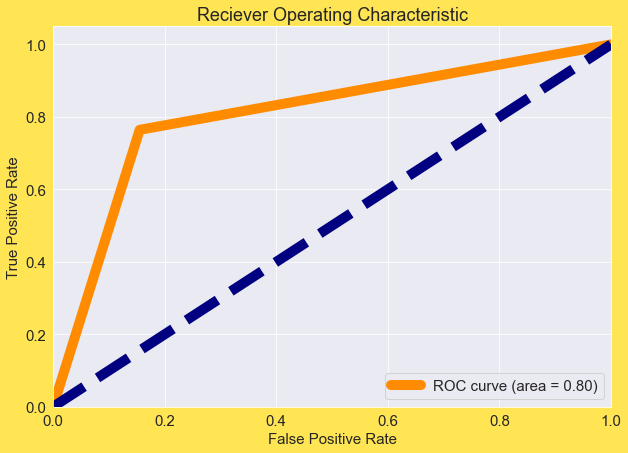

In [181]:
# plotting a auc roc with respect to ETC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_etc_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw=10,label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color = 'navy',lw = 10, linestyle = '--')
plt.xlim([0.0,1.0]) # limitation
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc='lower right') 
plt.show()

# we can say that our model is working 80% 

## SAVING THE MODEL

In [182]:
import pickle
filename = 'loan_status.pkl'
pickle.dump(etc,open(filename, 'wb'))

In [185]:
import numpy as np
a = np.array(y_test)
predicted = np.array(etc.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com.sample(20)
# comparison of predicted and original value

,Original,Predicted
79,1,1
56,0,0
97,0,0
212,1,1
125,0,0
110,1,0
45,1,1
136,0,0
119,0,0
60,1,1
